# IDS Assignment Part 2 - <font color="red"><h7>Deadline: 23/01/2023 23:59</h7></font>
This is the second part of the assignment in IDS 2022/2023. 
Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing your screenshots for Question 7. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

<font color="red"><b>Student Names and IDs:
    
    1. Pol Burkardt Freire, 446724
    
    2. Aravind Sankaran, 351286
    
    3. Benedikt Holzbach, 437058

## Question 1: Preprocessing (20 points)

In [1]:
import pandas as pd

### Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

import numpy as np

In this question, we consider a dataset documenting the Ski Resorts in Europe (**ski_resorts.csv**).
Each row contains some information about the Ski resort.
You can find a short description for each column:

| Column | Description |
| ------ | ----------- |
| Resort | The name of the ski & snowboard resort. |
| Country | The country in which the resort is located. |
| HighestPoint | The highest mountain point at the ski resort.   |
| LowestPoint | The lowest possible point to ski at the ski resort.  |
| DayPassPriceAdult | The price shows what it costs for 1 adult for 1 day in the main season in Euro. |
| BeginnerSlope | The total amount of “beginner” slopes in kilometer at the resort. “Beginner slopes” contains “children”, “blue” and, “green” slopes. |
| IntermediateSlope | The total amount of “intermediate” slopes in kilometer at the resort. “Intermediate slopes” contains “red” slopes. |
| DifficultSlope | The total amount of “difficult” slopes in kilometer at the resort. “Difficult slopes” contains “black”, “advanced”, and ”expert” slopes. |
| TotalSlope | The sum of “beginner slopes” + “intermediate slopes” + “difficult slopes” |
| Snowparks | Does the resort have one or more snowparks, or not? |
| NightSki | Does the resort offer skiing on illuminated slopes? |
| SurfaceLifts | The amount of lifts in this category: T-bar, Sunkidslift, Rope lifts, and people mower. |
| ChairLifts | The total amount of chairlifts. |
| GondolaLifts | The amount of lifts in this category: Gondola, Train lifts, Funicular, Combined gondola and chairlifts, Helicopter lifts, Snowcats, and Aerial tramways. |
| TotalLifts | The sum of “surface lifts etc” + “gondola etc” + “chairlifts etc.” |
| LiftCapacity | How many passengers can the lift system at the ski resort mowe in one hour? |
| SnowCannons  |The total amount of snow cannons at the ski resort.|

### a) Loading the Data and Initial Quality Investigation (2.5pts)

#### **a(i)** 
Load the dataset into a dataframe `df`. <font color='red'>Use the first column as index for your dataframe</font>. Ensure that the index is valid, that is, it should not contain any duplicate entries. 



**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [2]:
# your code
df = pd.read_csv("datasets/ski_resorts.csv", index_col=0)

In [3]:
df.index.duplicated().any()

False

#### **a(ii)** 
Show the data types of the dataframe columns as well as the first 5 rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)?



In [4]:
print(df.dtypes)
df.head()

Resort                object
Country               object
HighestPoint         float64
LowestPoint          float64
DayPassPriceAdult    float64
BeginnerSlope        float64
IntermediateSlope      int64
DifficultSlope       float64
TotalSlope             int64
Snowparks             object
NightSki              object
SurfaceLifts         float64
ChairLifts             int64
GondolaLifts         float64
TotalLifts             int64
LiftCapacity         float64
SnowCannons          float64
dtype: object


Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint  DayPassPriceAdult  BeginnerSlope  \
1        1980.0        740.0               52.0           30.0   
2        2640.0       1710.0               47.0          100.0   
3        1130.0        900.0               30.0            1.0   
4        1620.0        780.0               42.0           15.0   
5        2320.0        940.0               22.0           30.0   

   IntermediateSlope  DifficultSlope  TotalSlope Snowparks NightSki  \
1                 81             4.0         115       Yes       No   
2                 77            33.0         210       Yes      Yes   
3                  0             1.0           2        No       No   
4                 33             3.0          51       Yes      Yes   
5                 26            21.0          77       Yes       No   

   SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
1          22.0          16          11.0          49       75398.0   
2          37.0          28           7.0          72       99017.0   
3           2.0           0           0.0           2        1932.0   
4          25.0           8           3.0          36       32938.0   
5           6.0          11          10.0          27       49228.0   

   SnowCannons  
1        600.0  
2       1032.0  
3          0.0  
4        163.0  
5        450.0

**Your Answer:** 
No. The only columns that have non-numerical data type are:
- Resort: To be expected, since it holds the name of the resort (string)
- Country: To be expected, since it holds the name of the country (string) 
- Snowparks: Is valid, because it holds a boolean state, in this case represented with a 'Yes' or 'No' (string)
- NightSki: Is valid, because it holds a boolean state, in this case represented with a 'Yes' or 'No' (string)

However, there are a few things that should be considered here:
- Snowparks and Nightski could be transformed such that they hold boolean values (True, False) or uint8s (1, 0).
- The fact that Beginner- and DifficultSlope are float, but TotalSlope is int, causes us to lose some precision in the column TotalSlope. Ideally, these should all be either float or int.

#### **a(iii)** 
To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable.
Are there any categorical column candidates? Explain your answer. \
Afterward, convert the column(s) in `df` into categorical column(s).

In [5]:
df.nunique()

Resort               376
Country               27
HighestPoint         276
LowestPoint          238
DayPassPriceAdult     52
BeginnerSlope         82
IntermediateSlope     86
DifficultSlope        44
TotalSlope           129
Snowparks              2
NightSki               2
SurfaceLifts          47
ChairLifts            37
GondolaLifts          23
TotalLifts            67
LiftCapacity         328
SnowCannons          152
dtype: int64

**Your Answer:** The less unique values a column has the better candidate it is to be a categorical column. Therefore, after looking at the cardinality of the diffferent columns, we have decided to turn:
- _DayPassPriceAdult_:  (Cheap, Normal, Expensive)  
- _BeginnerSlope_: (Many, Normal, Few)
- _IntermediateSlope_: (Many, Normal, Few)
- _DifficultSlope_: (Many, Normal, Few)

into categorical variables.
The Columns that correspond to the Lift types were not used, because they are required to stay numerical for a future task.


In [6]:
def get_cat_col(df, col_name, cats=["Few", "Normal", "Many"]):
    low_thresh = df[col_name].quantile(0.33)
    high_thresh = df[col_name].quantile(0.66)

    tmp_df = pd.DataFrame(df[col_name])
    tmp_df.loc[:, col_name] = cats[1] # Normal
    tmp_df.loc[df[col_name] < low_thresh, col_name] = cats[0] # Few
    tmp_df.loc[df[col_name] > high_thresh, col_name] = cats[2] # Many
    return tmp_df[col_name]

In [7]:
# Convert to categorical
df["DayPassPriceAdult"] = get_cat_col(df, "DayPassPriceAdult", ["Cheap", "Normal", "Expensive"])
df["BeginnerSlope"] = get_cat_col(df, "BeginnerSlope")
df["IntermediateSlope"] = get_cat_col(df, "IntermediateSlope")
df["DifficultSlope"] = get_cat_col(df, "DifficultSlope")

In [8]:
df.nunique()

Resort               376
Country               27
HighestPoint         276
LowestPoint          238
DayPassPriceAdult      3
BeginnerSlope          3
IntermediateSlope      3
DifficultSlope         3
TotalSlope           129
Snowparks              2
NightSki               2
SurfaceLifts          47
ChairLifts            37
GondolaLifts          23
TotalLifts            67
LiftCapacity         328
SnowCannons          152
dtype: int64

As expected, we now have only 3 different values for the categorical columns.

In [9]:
df.head()

Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint DayPassPriceAdult BeginnerSlope  \
1        1980.0        740.0         Expensive        Normal   
2        2640.0       1710.0         Expensive          Many   
3        1130.0        900.0             Cheap           Few   
4        1620.0        780.0            Normal        Normal   
5        2320.0        940.0             Cheap        Normal   

  IntermediateSlope DifficultSlope  TotalSlope Snowparks NightSki  \
1              Many         Normal         115       Yes       No   
2              Many           Many         210       Yes      Yes   
3               Few            Few           2        No       No   
4            Normal         Normal          51       Yes      Yes   
5            Normal           Many          77       Yes       No   

   SurfaceLifts  ChairLifts  GondolaLifts  TotalLifts  LiftCapacity  \
1          22.0          16          11.0          49       75398.0   
2          37.0          28           7.0          72       99017.0   
3           2.0           0           0.0           2        1932.0   
4          25.0           8           3.0          36       32938.0   
5           6.0          11          10.0          27       49228.0   

   SnowCannons  
1        600.0  
2       1032.0  
3          0.0  
4        163.0  
5        450.0

### b) Handling Missing Values & Encoding (17.5pts)

In the following task, you can assume that every NAN entry in the dataframe is actually a missing value. This can partially be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., a string indicating a missing number in a number column would result in pandas parsing an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.

#### **b(i)** 
Simply discarding missing entries is usually not a good idea. Therefore, you should first analyze the number of missing values and check for patterns of missing values. 

To this end, compute the following statistics on missing values:
1. How many entries does the dataframe have? (To relate this to the number of entries missing)
2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?
3. How many rows have at least a single missing value?
4. Count the number of missing values per column.
5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
6. What do you observe? Are there any rows containing missing values for the same set of columns? Can you identify potential patterns?


In [10]:
# your code for 1. How many entries does the dataframe have? (To relate this to the number of entries missing)

n_rows = df.shape[0]
n_rows

376

In [11]:
# your code for 2. How many missing values do we have? What is the ratio i.e., "number of missing values"/"number of entries of df"?

n_na = df.isna().sum().sum()
na_ratio = n_na/n_rows

print("Missing vals:", n_na)
print("Missing vals ratio:", na_ratio)

Missing vals: 54
Missing vals ratio: 0.14361702127659576


In [12]:
# your code for 3. How many rows have at least a single missing value?

df.shape[0] - (df.dropna().shape[0])

37

In [13]:
# your code for 4. Count the number of missing values per column.
print(df.isna().sum())

Resort                0
Country               0
HighestPoint         13
LowestPoint           3
DayPassPriceAdult     0
BeginnerSlope         0
IntermediateSlope     0
DifficultSlope        0
TotalSlope            0
Snowparks             0
NightSki              0
SurfaceLifts          6
ChairLifts            0
GondolaLifts          7
TotalLifts            0
LiftCapacity         17
SnowCannons           8
dtype: int64


In [14]:
# your code for 5. Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.
na_count = df.isna().sum(axis=1)
na_rows = na_count[na_count > 0]
print("(#nan values, rows affected)")
na_rows.value_counts()

(#nan values, rows affected)


1    28
3     8
2     1
dtype: int64

In [15]:
df[na_count >= 2]

Resort  Country  HighestPoint  \
119                                             Aprica    Italy        2270.0   
217             Dry slopes Dayz Søhøjlandets Skicenter  Denmark           NaN   
218  Indoor ski area Skidome Denmark – Randers (pla...  Denmark           NaN   
219                     Dry slopes Indoorski – Rødovre  Denmark           NaN   
220                      Dry slopes Ski Arena – Aarhus  Denmark           NaN   
221                               Copenhagen (planned)  Denmark           NaN   
222                               Østerlars (Bornholm)  Denmark           NaN   
223                            Hoch Hylkedal – Kolding  Denmark           NaN   
342                                Hedelands Skicenter  Denmark           NaN   

     LowestPoint DayPassPriceAdult BeginnerSlope IntermediateSlope  \
119       1162.0            Normal        Normal            Normal   
217         80.0            Normal        Normal               Few   
218         10.0            Normal        Normal               Few   
219         50.0            Normal        Normal               Few   
220         20.0            Normal        Normal               Few   
221          0.0            Normal        Normal               Few   
222         72.0            Normal        Normal               Few   
223         20.0            Normal        Normal               Few   
342         33.0            Normal        Normal               Few   

    DifficultSlope  TotalSlope Snowparks NightSki  SurfaceLifts  ChairLifts  \
119         Normal          50       Yes       No           NaN           4   
217         Normal           0        No       No           0.0           0   
218         Normal           3        No       No           0.0           0   
219         Normal           0        No       No           0.0           0   
220         Normal           0        No       No           0.0           0   
221         Normal           0        No       No           0.0           0   
222         Normal           0        No       No           0.0           0   
223         Normal           0        No       No           0.0           0   
342         Normal           0        No       No           0.0           0   

     GondolaLifts  TotalLifts  LiftCapacity  SnowCannons  
119           2.0          16           NaN          0.0  
217           0.0           0           NaN          NaN  
218           0.0           0           NaN          NaN  
219           0.0           0           NaN          NaN  
220           0.0           0           NaN          NaN  
221           0.0           0           NaN          NaN  
222           0.0           0           NaN          NaN  
223           0.0           0           NaN          NaN  
342           0.0           0           NaN          NaN

**Your answer:** *(for 6. What do you observe? Are there any rows containing missing values for the same set of columns?)* 

It seems to be the case that, for the 8 rows that have 3 missing values, they are always in the same columns: *HighestPoint*, *LiftCapacity* and *SnowCannons*. 

#### **b(ii)**
For the next step:

1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`

In the end, the original categorical column(s) should still be there. Additionally, there should be x number (x is the number of unique values) of one-hot encoding columns for each categorical column. Use the following naming convention for the new columns "{name of the categorical column}_{unique value for that column}" Also, make sure the columns "Snowparks" and "NightSki" are boolean type in the end.
Lastly, print the top five rows of the resulting dataframe.

*Hint: You can use the pd.get_dummies() function from pandas for the first transformation*

In [16]:
# your code for 1. Transform the categorical column(s) you identified in a(iii) into one-hot encoding format. 
df = pd.get_dummies(df, columns=['DayPassPriceAdult', 'BeginnerSlope', 'IntermediateSlope', 'DifficultSlope'])

In [17]:
df.head()

Resort          Country  \
1                              Alpendorf (Ski amedé)          Austria   
2  Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...          Andorra   
3                              Oberau (Wildschönau)          Austria   
4                                     Dachstein West          Austria   
5                                        Rosa Khutor  Southern Russia   

   HighestPoint  LowestPoint  TotalSlope Snowparks NightSki  SurfaceLifts  \
1        1980.0        740.0         115       Yes       No          22.0   
2        2640.0       1710.0         210       Yes      Yes          37.0   
3        1130.0        900.0           2        No       No           2.0   
4        1620.0        780.0          51       Yes      Yes          25.0   
5        2320.0        940.0          77       Yes       No           6.0   

   ChairLifts  GondolaLifts  ...  DayPassPriceAdult_Normal  BeginnerSlope_Few  \
1          16          11.0  ...                         0                  0   
2          28           7.0  ...                         0                  0   
3           0           0.0  ...                         0                  1   
4           8           3.0  ...                         1                  0   
5          11          10.0  ...                         0                  0   

   BeginnerSlope_Many  BeginnerSlope_Normal  IntermediateSlope_Few  \
1                   0                     1                      0   
2                   1                     0                      0   
3                   0                     0                      1   
4                   0                     1                      0   
5                   0                     1                      0   

   IntermediateSlope_Many  IntermediateSlope_Normal  DifficultSlope_Few  \
1                       1                         0                   0   
2                       1                         0                   0   
3                       0                         0                   1   
4                       0                         1                   0   
5                       0                         1                   0   

   DifficultSlope_Many  DifficultSlope_Normal  
1                    0                      1  
2                    1                      0  
3                    0                      0  
4                    0                      1  
5                    1                      0  

[5 rows x 25 columns]

In [18]:
# your code for 2. Transform the columns "Snowparks" and "NightSki" in `df` into boolean data type, where "Yes" should be `True` and "No" should be `False`
df.replace('Yes', True, inplace=True)
df.replace('No', False, inplace=True)

In [19]:
# use df.dtypes to check if you correctly transform the data
df.dtypes

Resort                          object
Country                         object
HighestPoint                   float64
LowestPoint                    float64
TotalSlope                       int64
Snowparks                         bool
NightSki                          bool
SurfaceLifts                   float64
ChairLifts                       int64
GondolaLifts                   float64
TotalLifts                       int64
LiftCapacity                   float64
SnowCannons                    float64
DayPassPriceAdult_Cheap          uint8
DayPassPriceAdult_Expensive      uint8
DayPassPriceAdult_Normal         uint8
BeginnerSlope_Few                uint8
BeginnerSlope_Many               uint8
BeginnerSlope_Normal             uint8
IntermediateSlope_Few            uint8
IntermediateSlope_Many           uint8
IntermediateSlope_Normal         uint8
DifficultSlope_Few               uint8
DifficultSlope_Many              uint8
DifficultSlope_Normal            uint8
dtype: object

#### **b(iii)** 
The previous analysis in b(i) showed that there are missing values in the 'SurfaceLifts' and 'GondolaLifts' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Remember the semantics of the columns. Also, carefully assert your assumptions.*


**Your Answer:** *(Motivate your approach.)* 

Many methods could be used: median, mean, mode... or even linear regression, k-nearest neighbors...  
Taking into account the domain of the problem, we should keep in mind that the sum of all types of Lifts should equal TotalLifts.  
Thus, we will first impute the missing values in the column SurfaceLifts using the mean, round it, and then we will impute the column GondolaLifts with the difference between TotalLifts and (Surface + Chair Lifts).   
The reason why we do the SurfaceLifts with the mean and not the other way around is because we have 1 less missing value, and we hope that that will give us a slightly more insightful mean.

In [20]:
print(df.isna().sum())

Resort                          0
Country                         0
HighestPoint                   13
LowestPoint                     3
TotalSlope                      0
Snowparks                       0
NightSki                        0
SurfaceLifts                    6
ChairLifts                      0
GondolaLifts                    7
TotalLifts                      0
LiftCapacity                   17
SnowCannons                     8
DayPassPriceAdult_Cheap         0
DayPassPriceAdult_Expensive     0
DayPassPriceAdult_Normal        0
BeginnerSlope_Few               0
BeginnerSlope_Many              0
BeginnerSlope_Normal            0
IntermediateSlope_Few           0
IntermediateSlope_Many          0
IntermediateSlope_Normal        0
DifficultSlope_Few              0
DifficultSlope_Many             0
DifficultSlope_Normal           0
dtype: int64


In [21]:
# your code
mean_sl = int(df['SurfaceLifts'].mean())
df['SurfaceLifts'] = df['SurfaceLifts'].fillna(mean_sl)

In [22]:
print(df['TotalLifts'].isna().any())
print(df['ChairLifts'].isna().any())
print(df['SurfaceLifts'].isna().any())

False
False
False


In [23]:
df['SurfaceLifts']

1      22.0
2      37.0
3       2.0
4      25.0
5       6.0
       ... 
372    13.0
373    29.0
374     9.0
375     9.0
376     9.0
Name: SurfaceLifts, Length: 376, dtype: float64

In [24]:
tmp_series = df['TotalLifts'] - (df['SurfaceLifts'] + df['ChairLifts'])

In [25]:
print("Missing vals before:", df['GondolaLifts'].isna().sum())

df['GondolaLifts'] = df['GondolaLifts'].fillna(tmp_series)

print("Missing vals after:", df['GondolaLifts'].isna().sum())

Missing vals before: 7
Missing vals after: 0


#### **b(iv)**
Impute the rest of the missing values using the knn-imputation method. To this end, apply the following steps:
1. Create a working copy `df_tmp` of your updated `df`.
2. For simplicity, drop the non-numerical columns (i.e., not of types integer or floats), which also inlcude the one-hot encoded and the boolean columns* you created earlier.
3. Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, knn can become very biased.
4. Impute the missing values considering six neighbors.
5. Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
6. Append the columns you dropped in step 2.
 
In the end, `df` should not contain missing values and have all the columns.

\*Note that by dropping the columns we lose the information of countries and the two boolean attributes ("Snowparks" and "NightSki") when imputing the missing values, which might be crucial for inferencing values such as the price for a ski pass. In practice, one should try to find if there are correlations before deciding whether to drop the columns or not.
We drop the columns here to make the following steps easier because we only have to deal with numerical columns.

*Hint: Be careful with the indices of your dataframes.*


In [26]:
# your code for step 1 & 2
df_tmp = df.copy().select_dtypes(include='number', exclude='uint8')
df_tmp.dtypes

HighestPoint    float64
LowestPoint     float64
TotalSlope        int64
SurfaceLifts    float64
ChairLifts        int64
GondolaLifts    float64
TotalLifts        int64
LiftCapacity    float64
SnowCannons     float64
dtype: object

In [27]:
# your code for step 3
df_tmp_norm = (df_tmp - df_tmp.mean()) / df_tmp.std()

In [28]:
# your code for step 4
imputer = KNNImputer(n_neighbors=6)
df_imp_norm = pd.DataFrame(imputer.fit_transform(df_tmp_norm))
df_imp_norm.columns = df_tmp.columns

In [29]:
# your code for step 5
df_tmp = df_imp_norm * df_tmp.std() + df_tmp.mean()

In [30]:
cols = list(set(df.columns) - set(df_tmp.columns))
other_cols = df[cols]
#other_cols

In [31]:
# your code for step 6
other_cols = df[df.columns.difference(df_tmp.columns)]
df = pd.concat([df_tmp.reset_index(drop=True), other_cols.reset_index(drop=True)], axis=1)

In [32]:
assert df.isna().sum().sum() == 0

## Question 2: Visualization (13 points)

In this task, you will analyze the data using different means of visualization.

Start with the following preprocessed and integrated dataframe `df_v`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified.

In [33]:
import pandas as pd
import plotly.express as px
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_v = pd.read_csv("datasets/ski_resorts_visual.csv", index_col=0)

### **a) (3pts)** 
To start the visual analysis, make a Scatter plot matrix to visually check if there are any correlations between the numerical attributes.

*Hint: You can use the scatter_matrix from pandas.plotting or pairplot from seaborn to make the plot.*


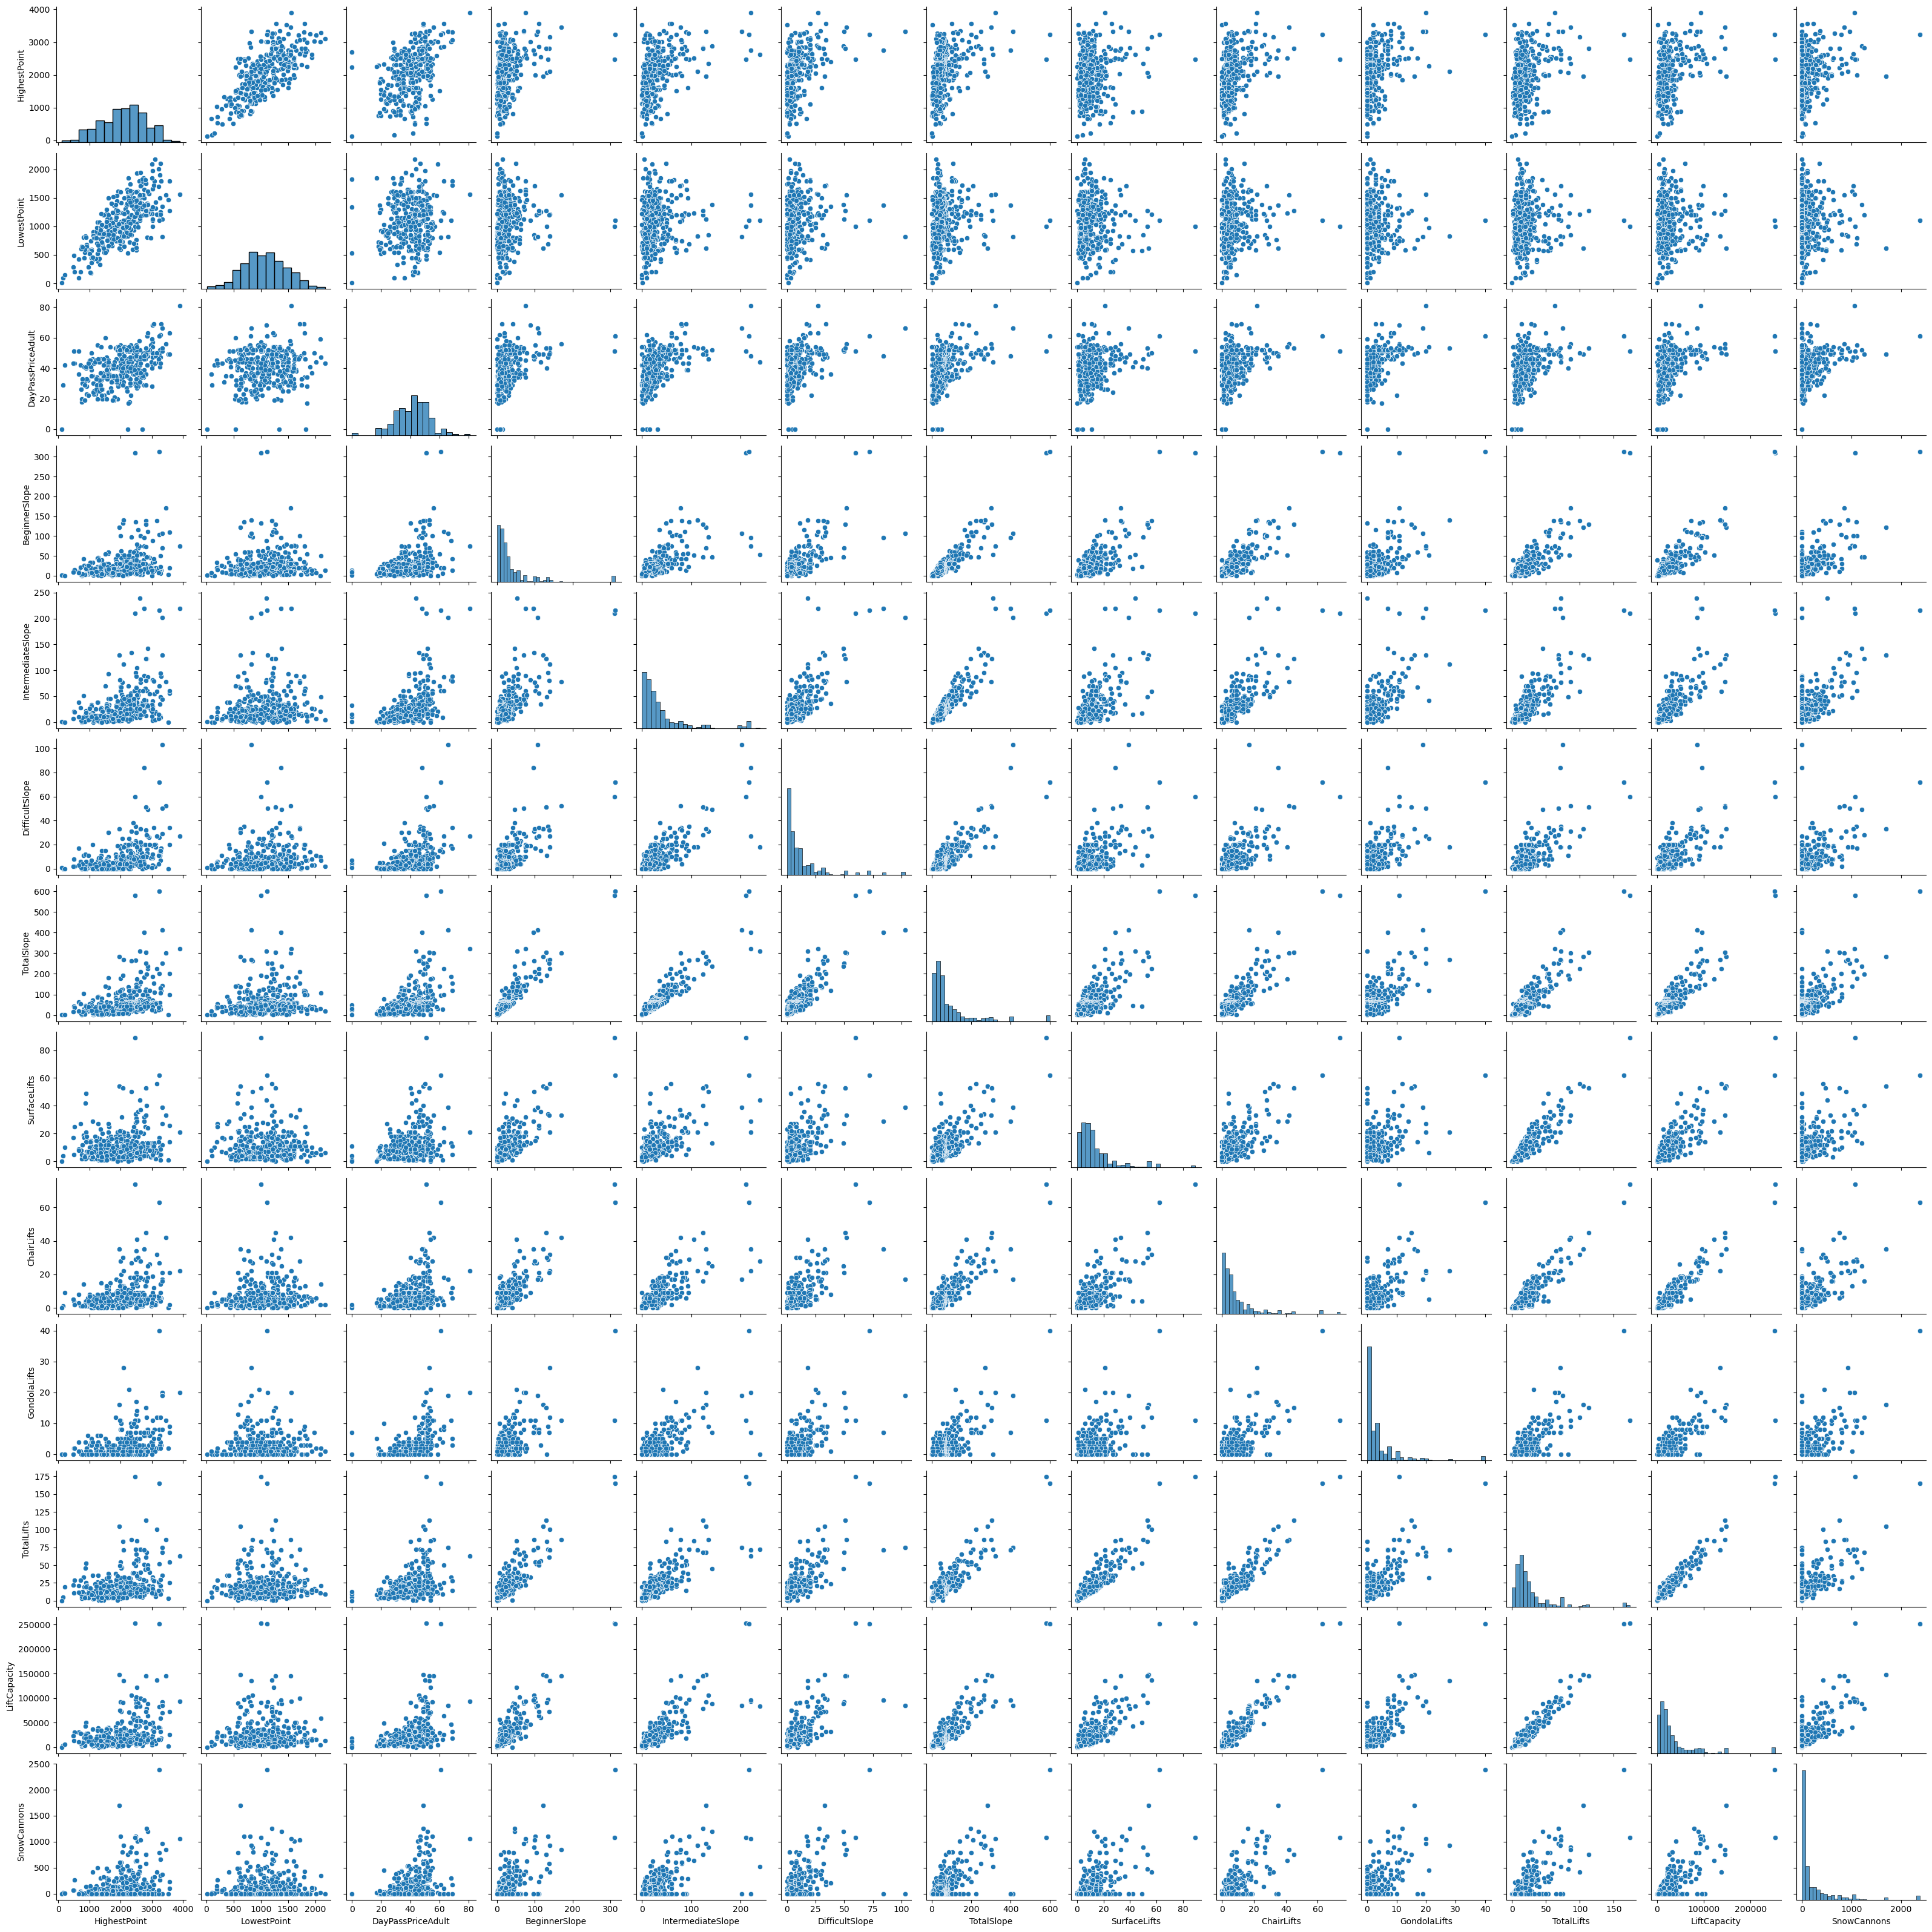

In [35]:
# your code
sns.pairplot(df_v.select_dtypes(include='number'), diag_kind="hist")

### **b) (3pts)**
Another way to detect correlation is to calculate the Pearson correlation coefficient. Calculate the correlation matrix for the numerical data and visualize the matrix using a heatmap. 
Briefly discuss your findings from the heatmap and the scatter plot you created in 2(a).

Make sure to annotate the heatmap with the values of the correlation.

*Hint: You can use the heatmap function from seaborn to make the plot.*

In [38]:
# your code
c_mat = df_v.corr(numeric_only=True)

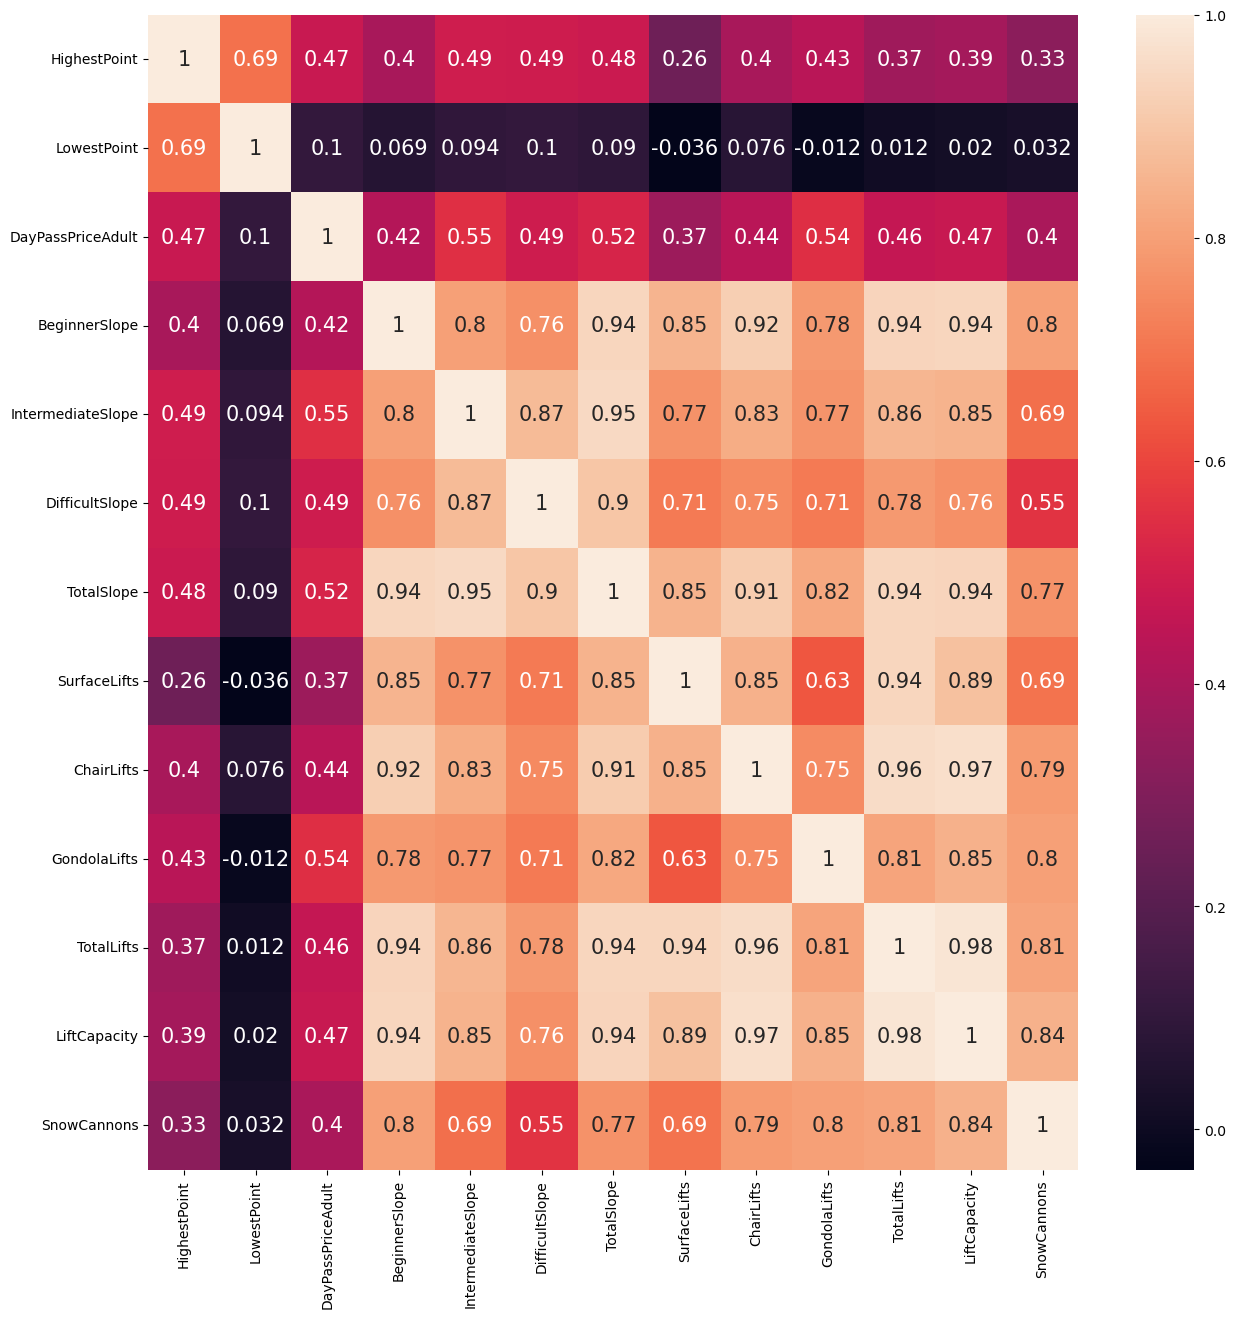

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(c_mat, annot=True, annot_kws={"size": 15})
plt.show()

*Answer*

<div style="color:green">

In general, since most of the features grow with the size of the resort, they all have arbitrairly strong positive correlation (most of them > 0.8). For example, the strongest positive correlation is found between TotalLifts and LiftCapacity (0.98).

The features "Highest Point", "Lowest point" and "DayPassPriceAdult" are the exception to this trend. Since they are not necessarily related to the size (number of lifts/slopes, snow cannons, etc.) of the resort unlike the other features, these three show little correlation with the rest of features.

Negative correlation between features is only shown in a few exceptions (e.g. Gondola Lifts and LowestPoint) where the absolute difference from 0 is so small that it is not relevant and should be interpreted as no correlation.

</div>

### **c) (4pts)** 
We now want to have an overview of the attribute "TotalSlope" aggregated by different levels of hierarchy (Europe -> Country -> Resort). It seems that a tree map is suitable for this purpose.

Make a tree map where
- the root node represents Europe.
- the child nodes of Europe are countries.
- the child nodes of each country are the ski resorts.
- the size of the rectangles is determined by the attribute "TotalSlope".

Also, use the tree map to find out
1. The sum of TotalSlopes of a country, list the top five countries and the corresponding values.
2. The max value of TotalSlope of the five countries you identified in 1.

*Hint: You can use the treemap function from plotly.express.*

In [36]:
df_v["Continent"] = "Europe"

In [37]:
# your code
fig = px.treemap(df_v, path=['Continent', 'Country', 'Resort'], values='TotalSlope')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
)
fig.show()

**Your answer for...** \
*...  1. The sum of TotalSlopes of a country. List the top five countries and the corresponding values:* \
*...  2. The max value of TotalSlope of the five countries you identified in 1:*


The sum of TotalSlopes in France is 12,546 slopes. 

The top 5 countries with their corresponding values are:
1. France: 12,546
2. Austria: 7,005
3. Switzerland: 5,710
4. Italy: 3,742
5. Andorra: 723

The max value of TotalSlope of the five countries above is France with 12,546.

### **d) (3pts)** 

An alternative to a tree map is a sunburst plot, the principle is similar to a tree map. 

Recall from the lecture that:
- Each ring is a different level of the hierarchy
- Each segment of a ring belongs to one categorical value
- The size of a segment is either divided proportionally to a value

Now, we would like to have an overview of the attribute "TotalLifts" aggregated by different level of hierarchy.

Make a sunburst plot where
- the first hierarchy(ring) is "Country"
- the second hierarchy(ring) is "Snowparks" (whether the resort has snowparks)
- the third hierarchy(ring) is "Resort"
- the size of the segments is determined by the attribute "TotalLifts".

Then, briefly discuss your findings from the plot.

*Hint: You can use the sunburst function from plotly.express.*

In [39]:
# your code
fig = px.sunburst(df_v, path=['Country', 'Snowparks', "Resort"], values='TotalLifts')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
)
fig.show()

**Your answer:**


<div style="color:green">

From the innermost ring we can conclude that, combining the lifts of all of their resorts, the countries that have the most lifts are France, Austria, Switzerland and Italy, in this order. 

Additionally, from the second ring we can conclude that, in all of the countries with the most lifts (the ones that are visible with the current plot resolution), a large percentage of resorts has snowparks. 

Finally, from the third ring there are multiple things we can conclude. The first and most immediate one is to tell which resorts have a snowpark and which ones don't. Additionally, we can tell the number of lifts that a particular resort by its size. If we combine these two observations, we can for example draw the conclusion that, in most cases, the resorts that don't have snowparks also have fewer lifts, suggesting that big resorts are much more likely to have snowparks.

</div>

## Question 3 - Frequent Item Sets and Association Rules (15 points)

In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules as arules

### A real online retail transaction data set of two years.

Data Set Information:
This Retail dataset contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift ware. Many customers of the company are wholesalers.

Attribute Information:
- Invoice: Invoice number. Nominal. A 6-digit integral number is uniquely assigned to each transaction. If the number starts with 'C' it refers to a canceled transaction.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invoice date and time. Numeric. The day and time when a transaction was generated.
- Price: Unit price. Numeric. Product price per unit in sterling (£).
- CustomerID: Customer number. Nominal. A 5-digit integral number is uniquely assigned to each customer. This number has postfix 'n'.
- Country: Country name. Nominal. The name of the country where a customer resides.

### a) Loading, exploring and preprocessing the dataset (4 pts)

#### **a(i)** 
Load the data from `retail.csv` and save it under the variable `retail_df`. Display the first few lines of the dataframe.

In [5]:
# your code
retail_df = pd.read_csv("datasets/retail.csv")
retail_df.head(10)

Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5  536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6  536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7  536366     22633               HAND WARMER UNION JACK         6   
8  536366     22632            HAND WARMER RED POLKA DOT         6   
9  536368     22960             JAM MAKING SET WITH JARS         6   

        InvoiceDate  Price  CustomerID         Country  
0  01/12/2010 08:26   2.55      178500  United Kingdom  
1  01/12/2010 08:26   3.39      178500  United Kingdom  
2  01/12/2010 08:26   2.75      178500  United Kingdom  
3  01/12/2010 08:26   3.39      178500  United Kingdom  
4  01/12/2010 08:26   3.39      178500  United Kingdom  
5  01/12/2010 08:26   7.65      178500  United Kingdom  
6  01/12/2010 08:26   4.25      178500  United Kingdom  
7  01/12/2010 08:28   1.85      178500  United Kingdom  
8  01/12/2010 08:28   1.85      178500  United Kingdom  
9  01/12/2010 08:34   4.25      130470  United Kingdom

#### **a(ii)** 
To get to know the dataset, do the following:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of unique product names.
- Show the number of unique invoices.
- Show the number and the list of all the countries where the customers reside.

In [6]:
print("num rows:", retail_df.shape[0])
print("num unique customers:", retail_df["CustomerID"].unique().shape[0])
print("num unique product names:", retail_df["Description"].unique().shape[0])
print("num unique invoices:", retail_df["Invoice"].unique().shape[0])
print("num unique customer countries:", len(retail_df["Country"].unique()), "; List:")
print(retail_df["Country"].unique())

num rows: 406525
num unique customers: 4367
num unique product names: 3896
num unique invoices: 22177
num unique customer countries: 35 ; List:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Brazil'
 'USA' 'Bahrain' 'Malta' 'RSA']


#### **a(iii)** 
You are interested in analyzing itemsets that are frequently purchased together. Before continuing with that task, you have to make sure that the data are fit for such analysis. 1) More precisely, you want to make sure that there are no missing values in the data. 2) Moreover, you want to ensure that each item's name in the "Description" is consistent. E.g., you want "Description" values such as " coffee black", "coffee &nbsp;black", " coffee black &nbsp;", etc. to be mapped to the same value (e.g. "coffee black"). 3) Last but not least, you want to remove transactions that were canceled. Such transactions correspond to rows where the invoice number starts with letter 'C'.

Apply these preprocessing steps to the dataset `retail_df` and apply them on the dataframe itself (e.g. set inplace=True).

In [7]:
# 1) Check for missing values
retail_df.isna().any().sum()

0

In [8]:
# 2) Consistent Descriptions (Trim beginning and end spaces)
retail_df["Description"] = retail_df["Description"].str.strip()

In [9]:
# 3) Remove canceled transactions
retail_df = retail_df[~(retail_df["Description"].str.startswith('C'))]

#### **a(iv)** 
After applying the preprocessing steps in **a(iii)** , repeat again the task **a(ii)**, that is:

- Show the number of rows in the dataset.
- Show the number of unique customers.
- Show the number of all unique product names.
- Show the list of all the countries where the customers reside.

Which values changed?

In [10]:
num_invoices = retail_df["Invoice"].unique().shape[0]
num_prods = retail_df["Description"].unique().shape[0]

print("num rows:", retail_df.shape[0])
print("num unique customers:", retail_df["CustomerID"].unique().shape[0])
print("num unique product names:", num_prods)
print("num unique invoices:", num_invoices)
print("num unique customer countries:", len(retail_df["Country"].unique()), "; List:")
print(retail_df["Country"].unique())

num rows: 374023
num unique customers: 4357
num unique product names: 3546
num unique invoices: 21826
num unique customer countries: 35 ; List:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada' 'Brazil'
 'USA' 'Bahrain' 'Malta' 'RSA']


**Your answer:** All values changed except for the number of countries.

### b) Frequent itemsets and Association rules (8 pts)

#### **b(i)** 
Each invoice number in the dataset identifies a unique transaction. There are potentially many rows in the dataframe having the same invoice number. We want to analyze items that are frequently purchased together, that is, items that appear in the same transaction.

Create a new dataframe named `transaction_df` with two columns: "Invoice" and "Description". Here the "Invoice" value is the index of the dataframe (the unique number identifying each row) and "Description" is the column containing all items (without duplicates) purchased within the transaction with that invoice number. Display the first few rows of your dataframe. How many rows does the `transaction_df` have?

In [11]:
# your code
desc_gb = retail_df.groupby('Invoice')['Description']
transaction_df = desc_gb.apply(set).reset_index()

In [12]:
transaction_df.head()

Invoice                                        Description
0  536365  {WHITE METAL LANTERN, SET 7 BABUSHKA NESTING B...
1  536366  {HAND WARMER UNION JACK, HAND WARMER RED POLKA...
2  536367  {POPPY'S PLAYHOUSE BEDROOM, RECIPE BOX WITH ME...
3  536368  {BLUE COAT RACK PARIS FASHION, JAM MAKING SET ...
4  536369                         {BATH BUILDING BLOCK WORD}

**Your answer:**

In [14]:
print("N rows:", transaction_df.shape[0])
assert(num_invoices == transaction_df.shape[0])

N rows: 21826


#### **b(ii)** 
Next, we want to compute frequent itemsets and association rules based on the sets of items ordered together. Use the TransactionEncoder to transform `transaction_df` into a matrix such that the value in the i-th row and the j-th column is $True$ if the i-th itemset contains product j, and $False$ otherwise. Save the matrix into a dataframe named `transactions`. Display the shape of the matrix.

*Hint: Note that your dataframe 'transactions' must contain as many rows as there are invoice numbers and as many columns as there are unique products.*

In [15]:
# your code
enc = TransactionEncoder()
enc.fit(transaction_df["Description"])
tmp_mat = enc.transform(transaction_df["Description"])
transactions = pd.DataFrame(tmp_mat, columns=enc.columns_) 

In [16]:
transactions.shape

(21826, 3546)

In [17]:
assert(transactions.shape[0]==num_invoices)
assert(transactions.shape[1]==num_prods)

#### **b(iii)** 
Use the apriori method on `transactions` to obtain all frequent itemsets using min_support=0.01. Display all frequent itemsets that have at least three items. What support count does an itemset have for our case if it satisfies min_support=0.01?

In [18]:
# your code
freq_sets = apriori(transactions, min_support=0.01, use_colnames=True)
long_freq_sets = freq_sets[freq_sets["itemsets"].apply(lambda x: len(x) >= 3)] 

In [19]:
long_freq_sets

support                                           itemsets
671  0.012279  (ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...
672  0.012554  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...
673  0.018189  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...
674  0.014478  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
675  0.010675  (JUMBO BAG STRAWBERRY, JUMBO BAG RED RETROSPOT...
676  0.010217  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SU...
677  0.011958  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...
678  0.012050  (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
679  0.010263  (LUNCH BAG CARS BLUE, LUNCH BAG  BLACK SKULL.,...
680  0.010217  (LUNCH BAG SUKI DESIGN, LUNCH BAG CARS BLUE, L...
681  0.014157  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
682  0.010355  (LUNCH BAG PINK POLKADOT, LUNCH BAG  BLACK SKU...
683  0.010217  (LUNCH BAG SUKI DESIGN, LUNCH BAG PINK POLKADO...
684  0.011775  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
685  0.011637  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
686  0.010630  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
687  0.010034  (LUNCH BAG SUKI DESIGN, LUNCH BAG  BLACK SKULL...
688  0.010080  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
689  0.012920  (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
690  0.010309  (LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT,...
691  0.010859  (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
692  0.010950  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
693  0.010767  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
694  0.011592  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
695  0.011683  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
696  0.010996  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
697  0.010584  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...
698  0.011912  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
699  0.010309  (LUNCH BAG RED RETROSPOT, LUNCH BAG WOODLAND, ...
700  0.012416  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...
701  0.011042  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...

**Your answer:** Having support >= 0.01 means that the itemset appears in at least 218 transactions (support_count = | D | * support = 21826 * 0.01 = 218)

#### **b(iv)**
Now we will discover association rules from the frequent itemsets. Using only the frequent itemsets with min_support=0.01 (the ones obtained in **b(iii)**), generate different association rules using min_conf=0.6 and min_conf=0.9 as thresholds. Show the association rules for each of the thresholds. What do you notice w.r.t. the number of association rules produced for the different thresholds?

In [55]:
# your code
rules_o6 = arules(freq_sets, metric="confidence", min_threshold=0.6)
rules_o9 = arules(freq_sets, metric="confidence", min_threshold=0.9)

In [56]:
rules_o6

antecedents  \
0                    (ALARM CLOCK BAKELIKE CHOCOLATE)   
1                        (ALARM CLOCK BAKELIKE GREEN)   
2                        (ALARM CLOCK BAKELIKE IVORY)   
3                       (ALARM CLOCK BAKELIKE ORANGE)   
4                         (ALARM CLOCK BAKELIKE PINK)   
..                                                ...   
76  (ROSES REGENCY TEACUP AND SAUCER, REGENCY CAKE...   
77  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...   
78  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
79  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...   
80  (REGENCY CAKESTAND 3 TIER, GREEN REGENCY TEACU...   

                                          consequents  antecedent support  \
0                          (ALARM CLOCK BAKELIKE RED)            0.015349   
1                          (ALARM CLOCK BAKELIKE RED)            0.037066   
2                          (ALARM CLOCK BAKELIKE RED)            0.021992   
3                          (ALARM CLOCK BAKELIKE RED)            0.017227   
4                          (ALARM CLOCK BAKELIKE RED)            0.028819   
..                                                ...                 ...   
76                   (PINK REGENCY TEACUP AND SAUCER)            0.014478   
77                         (REGENCY CAKESTAND 3 TIER)            0.018189   
78                  (ROSES REGENCY TEACUP AND SAUCER)            0.012554   
79  (ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...            0.014616   
80  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...            0.017548   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.041510  0.010538    0.686567  16.539752  0.009901    3.058039  
1             0.041510  0.024558    0.662546  15.961078  0.023019    2.840360  
2             0.041510  0.014570    0.662500  15.959961  0.013657    2.839970  
3             0.041510  0.011637    0.675532  16.273907  0.010922    2.954034  
4             0.041510  0.018464    0.640700  15.434777  0.017268    2.667655  
..                 ...       ...         ...        ...       ...         ...  
76            0.027078  0.011042    0.762658  28.165446  0.010650    4.099246  
77            0.086227  0.011042    0.607053   7.040136  0.009473    2.325434  
78            0.038303  0.011042    0.879562  22.963303  0.010561    7.985000  
79            0.025520  0.011042    0.755486  29.603654  0.010669    3.985373  
80            0.020663  0.011042    0.629243  30.452004  0.010679    2.641450  

[81 rows x 9 columns]

In [57]:
rules_o6.shape

(81, 9)

In [58]:
rules_o9

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

In [59]:
rules_o9.shape

(0, 9)

**Your answer:** As is expected, increasing the threshold of confidence that we demand for an associateion rule to take place, decreases the number of association rules. In this case, a threshold of 0.9 leaves us with none. See the following plot, where the number of rules is plotted against the threshold.

<AxesSubplot:>

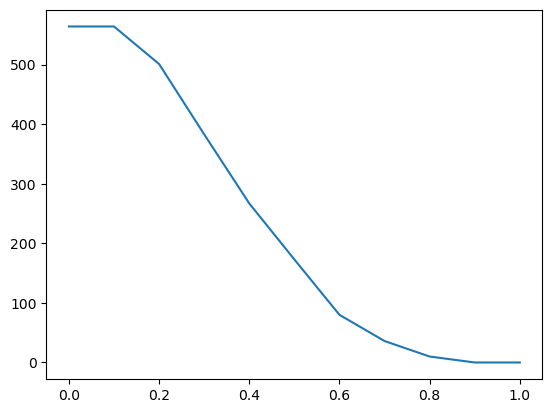

In [60]:
thresholds = []
num_rules = []

for i in range(0, 11):
    t =  0.1 * i
    n = len(arules(freq_sets, metric="confidence", min_threshold=t))
    thresholds.append(t)
    num_rules.append(n)

sns.lineplot(x=thresholds, y=num_rules)

#### **b(v)** 
From the association rules that satisfy the confidence threshold 0.6, select and show the two rules with the highest lift. What do you notice if you compare the two rules with each other?

In [61]:
# your code
rules_o6.sort_values(by="lift", ascending=False).iloc[:2]

antecedents                      consequents  \
31    (SET/6 RED SPOTTY PAPER CUPS)  (SET/6 RED SPOTTY PAPER PLATES)   
32  (SET/6 RED SPOTTY PAPER PLATES)    (SET/6 RED SPOTTY PAPER CUPS)   

    antecedent support  consequent support   support  confidence       lift  \
31            0.013058            0.014890  0.010813    0.828070  55.610645   
32            0.014890            0.013058  0.010813    0.726154  55.610645   

    leverage  conviction  
31  0.010618    5.729719  
32  0.010618    3.604002

**Your answer:** 

<div style="color:green">

The are the inverse of one another. (cups -> plates) & (plates -> cups). Also, they have the exact same support, lift and leverage. The likelihood with which a person will buy plates if they buy cups is the same as the likelihood that they buy cups if they are buying plates. 

</div>

#### **b(vi)** 

In the analysis tasks in **b)**, an itemset consisted of items that had the same invoice number (same transaction items). Thus, if an itemset was frequent, it meant that the items in it were frequently purchased together.
An association rule $A \Rightarrow B$ meant that if items in $A$ are purchased, then the items in $B$ are also purchased in that same transaction.

Suppose that we would repeat the analysis, but this time, the itemsets would consist of items having the same "CustomerID" (bought from the same customer). Interpret the meaning of the frequent itemsets and association rules for this kind of itemsets.

**Your answer:** 

<div style="color:green">

If we group by CustomerID, we get the set of all the items that one customer has bought in their entire life. If an itemset is frequent, it means that there are many other people who buy the same products in their lifetime. An association rule $A \Rightarrow B$ means that if items in $A$ are purchased, this same customer is likely to buy $B$ at some point. In the following, we show the top two association rules with the highest lift at minimum support threshold = 0.05. 

</div>

In [20]:
desc_gb_c = retail_df.groupby('CustomerID')['Description']
transaction_df_c = desc_gb_c.apply(set).reset_index()

enc_c = TransactionEncoder()
enc_c.fit(transaction_df_c["Description"])
tmp_mat = enc_c.transform(transaction_df_c["Description"])
transactions_c = pd.DataFrame(tmp_mat, columns=enc_c.columns_) 

freq_sets_c = apriori(transactions_c, min_support=0.05, use_colnames=True)
rules_o6_c = arules(freq_sets_c, metric="confidence", min_threshold=0.6)
print(rules_o6_c.sort_values(by="lift", ascending=False).iloc[:2][['antecedents', 'consequents' ]].to_string())

                                                          antecedents                                                        consequents
96        (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER)  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)
95  (ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)        (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKESTAND 3 TIER)


### c) Sequence Mining (3 pts)

For this task, the dataset used is `retail_sequences.csv`. Run the cell below to save the dataset under the dataframe `retail_sequences`. Each row in the dataframe corresponds to a unique customer (from the retail dataset). The "Customer" column contains the customer ID, whereas the "Sequence" column contains the sequence of itemsets  purchased by that customer.  Each value of "Sequence" is a sequence (list) of itemsets $<I_1, I_2, ..., I_n>$. The items within the same itemset (list without duplicates) $I_i$ were purchased together (they had the same invoice number). The itemsets are ordered by the timestamp of the transaction (value of InvoiceDate).

In [62]:
import pandas as pd 
retail_sequences = pd.read_csv('datasets/retail_sequences.csv', converters={'Sequence': pd.eval})

Given is the sequence *s= <{'lunch bag cars blue'}, {'herb marker rosemary','herb marker thyme'}, {'wooden star christmas scandinavian'}>*. Compute the support count of that sequence, that is, compute the number of customers whose corresponding itemset sequence contains it. Display its support count and the IDs of those customers.

*Hint: In the dataset provided, all product names are unified. They are all lowercase and have no trailing spaces.*

In [63]:
s = [['lunch bag cars blue'], ['herb marker rosemary', 'herb marker thyme'], ['wooden star christmas scandinavian']]

In [64]:
def is_item_subset(small, big):
    return (set(small).issubset(set(big)))


def find_item_set(x, item_set, start_i):
    for i in range(start_i, len(x)):
        if is_item_subset(item_set, x[i]):
            return True, i

    return False, None


def contains_seq(x, seq):
    last_i = -1
    for item_set in seq:
        found, last_i = find_item_set(x, item_set, last_i + 1)
        #print(item_set, found, last_i)
        
        if not found:
            return False      
    
    return True

In [215]:
#x = [['lunch bag cars blue', 'aaa'], ['herb marker rosemary', 'herb marker thyme', 'a'], ['wooden star christmas scandinavian']]
#contains_seq(x, s)

['lunch bag cars blue'] True 0
['herb marker rosemary', 'herb marker thyme'] True 1
['wooden star christmas scandinavian'] True 2


True

In [65]:
super_seqs = retail_sequences[retail_sequences["Sequence"].apply(lambda x: contains_seq(x, s))]

In [66]:
# your code
print("Support count:", super_seqs.shape[0])
print("Customer IDs:", super_seqs["Customer"].unique())

Support count: 5
Customer IDs: [127480 149110 178410 130500 132630]


## Question 4: Text Mining (12 pts)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import tokenize
from gensim.parsing.preprocessing import STOPWORDS, remove_stopword_tokens, strip_punctuation

from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk import download
from nltk.stem import WordNetLemmatizer

import pandas as pd
import seaborn as sns
import numpy as np

In [68]:
download('wordnet')

[nltk_data] Downloading package wordnet to /home/pol/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### F.R.I.E.N.D.S.

In this task we will use the script from the well-known series "F.R.I.E.N.D.S.". We will apply feature extraction methods to map the line of each main character onto a vector of a vector space. Then we will train a classifier whose aim will be to predict the name of the character given a particular line from the script.
In the end, we will train language models using N-grams and produce fake sentences for each of the main characters.

### a) Data Loading and Preprocessing (4 pts)

#### **a(i)** 
Import the file `FRIENDS.csv` and save it into a dataframe named `friends_df`. Note that the dataframe must contain two columns: one indicating the character's name and one containing a line from the script. Display the first few lines from the dataframe.

<i>FYI: The script has been filtered so that it only contains lines from the main characters. The order of the lines in the data is the same as the order of the lines in the original script. Metadata and scene descriptions have been removed. Your corpus consists of all the lines contained in the data. Each row's "line" value is a single document. </i>

In [69]:
# your code
friends_df = pd.read_csv('datasets/FRIENDS.csv')
friends_df.head()

character                                               line
0    Monica   There's nothing to tell! He's just some guy I...
1      Joey   C'mon  you're going out with the guy! There's...
2  Chandler   All right Joey  be nice.  So does he have a h...
3    Phoebe                           Wait  does he eat chalk?
4    Phoebe   Just  'cause  I don't want her to go through ...

#### **a(ii)**  
Plot the line count distribution among the six main characters (the six possible values of the column "character"). For example, show a plot containing one bar for each character whose height reflects the number of lines in `friends_df`. Briefly comment on the plot.

<AxesSubplot:xlabel='character', ylabel='Count'>

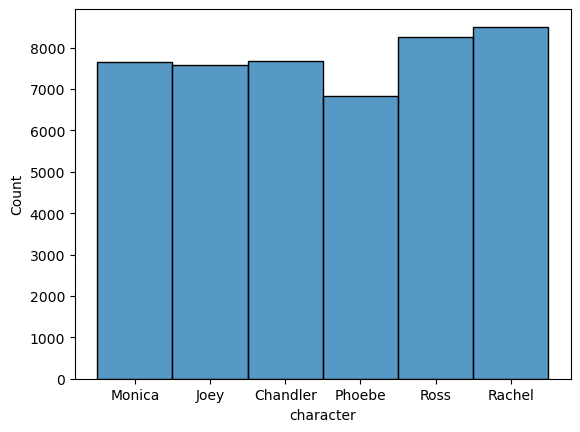

In [70]:
# your code
sns.histplot(friends_df["character"])

**Your answer:** 

<div style="color:green">

The number lines seems to be uniformly distributed across all characters. Phoebe is the character with the least lines, while Rachel has the most lines.

</div>

#### **a(iii)**  
Create a corpus named `corpus` such that each document in the corpus corresponds to exactly one row's "line" in `friends_df`.

In [71]:
# your code
corpus = [doc for doc in friends_df["line"]]
corpus

[" There's nothing to tell! He's just some guy I work with!",
 " C'mon  you're going out with the guy! There's gotta be something wrong with him!",
 ' All right Joey  be nice.  So does he have a hump? A hump and a hairpiece?',
 ' Wait  does he eat chalk?',
 " Just  'cause  I don't want her to go through what I went through with Carl- oh!",
 " Okay  everybody relax. This is not even a date. It's just two people going out to dinner and- not having sex.",
 ' Sounds like a date to me.',
 " Alright  so I'm back in high school  I'm standing in the middle of the cafeteria  and I realize I am totally naked.",
 " Then I look down  and I realize there's a phone... there.",
 ' Instead of...?',
 " That's right.",
 ' Never had that dream.',
 ' No.',
 " All of a sudden  the phone starts to ring. Now I don't know what to do  everybody starts looking at me.",
 " And they weren't looking at you before?!",
 " Finally  I figure I'd better answer it  and it turns out it's my mother  which is very-very wei

#### **a(iv)**  
Write a function called `my_preprocessor` which, given a string, returns another string after tokenization, stopword removal and lemmatization have been applied. The remaining terms (tokens after stopword removal and lemmatization has been applied) should be joined in the same string using space ' '.

In [72]:
# your code
def my_preprocessor(s):
    # Tokenization
    tokens = tokenize(s)
    
    # Stop word removal
    tokens = remove_stopword_tokens(tokens, list(STOPWORDS))
    
    # Lemmatizaztion
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

#### **a(v)**   
You must apply your preprocessor `my_preprocessor` on each line contained in the `corpus`. Create a preprocessed corpus named `corpus_p` which contains the same lines as `corpus` after the preprocessor `my_preprocessor` has been applied.

In [73]:
# your code
corpus_p = [my_preprocessor(doc) for doc in corpus]

In [74]:
corpus_p

['There s tell He s guy I work',
 'C mon going guy There s gotta wrong',
 'All right Joey nice So hump A hump hairpiece',
 'Wait eat chalk',
 'Just cause I t want I went Carl oh',
 'Okay everybody relax This date It s people going dinner having sex',
 'Sounds like date',
 'Alright I m high school I m standing middle cafeteria I realize I totally naked',
 'Then I look I realize s phone',
 'Instead',
 'That s right',
 'Never dream',
 'No',
 'All sudden phone start ring Now I t know everybody start looking',
 'And weren t looking',
 'Finally I figure I d better answer turn s mother weird call',
 'Hi',
 'This guy say hello I wanna kill',
 'Are okay sweetie',
 'I feel like reached throat grabbed small intestine pulled mouth tied neck',
 'Cookie',
 'Carol moved stuff today',
 'Ohh',
 'Let coffee',
 'Thanks',
 'Ooh Oh',
 'No t Stop cleansing aura No leave aura okay',
 'Fine Be murky',
 'I ll fine alright Really I hope ll happy',
 'No t',
 'No I t hell left',
 'And knew lesbian',
 'No Okay Why

#### **a(vi)**   
Split the `friends_df` dataset from the previous task into training (80%) and test (20%) data preserving the distribution based on the "character" value. 

In [75]:
# your code
X_train, X_test, y_train, y_test = train_test_split(friends_df["line"], friends_df["character"], test_size=0.2, random_state=100, stratify=friends_df["character"])

<AxesSubplot:xlabel='character', ylabel='Count'>

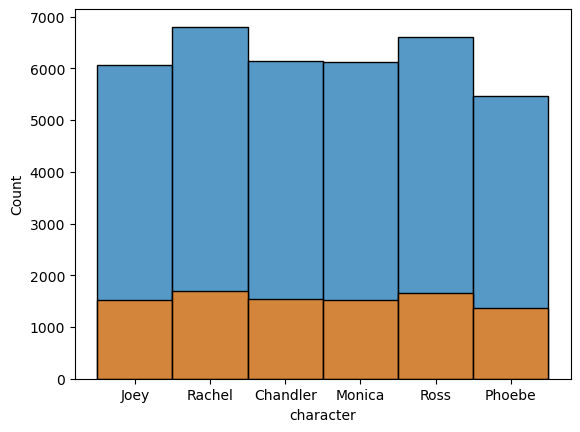

In [76]:
sns.histplot(y_train)
sns.histplot(y_test)

#### **a(vii)**   
Similar to **a(iii)**, for the training data and the test data, create two corpora named `corpus_train` and `corpus_test` respectively. Each document in the training (test) corpus must correspond to exactly one row's "line" value in the corresponding training (test) dataframe.

In [77]:
# your code
corpus_train = [doc for doc in X_train.values]
corpus_test = [doc for doc in X_test.values]

In [78]:
corpus_train

[" What are you talking about? 'One woman'? That's like saying there's only one flavor of ice cream for you. Lemme tell you something  Ross. There's lots of flavors out there. There's Rocky Road  and Cookie Dough  and Bing! Cherry Vanilla. You could get 'em with Jimmies  or nuts  or whipped cream! This is the best thing that ever happened to you! You got married  you were  like  what  eight? Welcome back to the world! Grab a spoon!",
 ' OK... see your two... and I raise you twenty. ',
 '  You guys ready fore the movies?',
 ' Oh  wish me luck!',
 " That's it! I'm tired of covering for you two! This has got to stop!  Ahh!  And tighty-whiteys! What are you  8?",
 ' Umm  wait! Do you want to set the mood a little?',
 ' Oh that is quite all right ma’am. ',
 ' That’s totally understandable.',
 ' I’m sorry honey  what were you saying?',
 ' This is like figure skating team all over again.  I mean synchronized swimming.  I mean- I mean the balance beam.  Help me!',
 " Joey! Come on! I don’t wan

### b) Set of Words (4.5 pts)

#### **b(i)**  
We want to encode our text in such a way that for each word in the vocabulary, we are only interested in whether the word appears or not in a given document. Create such a Set of Words encoding for the whole corpus `corpus`. Use the previously defined preprocessor `my_preprocessor` as preprocessor.

In [79]:
# your code
vectorizer = CountVectorizer()

mat = vectorizer.fit_transform([my_preprocessor(doc) for doc in corpus])
vocabulary = vectorizer.get_feature_names_out()

In [80]:
print(mat.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### **b(ii)**  
Pick one (any) of the lines of the "line" column in the `friends_df` dataset. Display the line in:
    1) its original form, 
    2) its preprocessed version (the result contained in `corpus_p` after applying `my_preprocessor`), and 
    3) its encoding computed by the Set of Words method. This can be either an array (a vector) or a scipy matrix. 
Briefly comment on the Set of Words encoding.

In [81]:
# your code
o_line = corpus[3]
p_line = corpus_p[3]
enc_line = mat[3] 


In [84]:
print("Original:", o_line)
print("Processed line:", p_line)
print("Encoded line:", enc_line.toarray())
print(enc_line.shape)

assert(len(p_line.split(" ")) == enc_line.sum())


Original:  Wait  does he eat chalk?
Processed line: Wait eat chalk
Encoded line: [[0 0 0 ... 0 0 0]]
(1, 11564)


**Your answer:**

<div style="color:green">

We can observe that the one-hot-encoded matrix has a total of 11564 columns, meaning there are 11564 possible words that are used across the lines.    

The encoding that corresponds to this line is a row of the one-hot-encoded matrix containing a 1 in the words that correspond to the words that are within the line.

The encoding is performed on the preprocessed version of the line, which has a reduced number of words, compared to the original line.

We check that the number of ones (enc_line.sum()) of the encoded row corresponds to the number of words of the processed line.

</div>

#### **b(iii)**  
Create a Set of Words encoding based only on the documents in `corpus_train`. Use the previously defined preprocessor `my_preprocessor` as a preprocessor.

In [85]:
# your code
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform([my_preprocessor(doc) for doc in corpus_train])
X_test = vectorizer.transform([my_preprocessor(doc) for doc in corpus_test])

#### **b(iv)**  
In this task, we will use an SGD (Stochastic Gradient Descend) classifier to predict the character given a line from the corpus. Train the classifier on the Set of Words encoding of training corpus `corpus_train` using the character as the target feature and 'log_loss' as the loss function. Apply the classifier on the Set of Words encodings of both the training corpus and the test corpus `corpus_train`. Show its accuracy for both the training corpus and the test corpus.

In [86]:
# your code
model = SGDClassifier(loss="log_loss")
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [87]:
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 0.42041331864233694
Test score: 0.2963560141889713


In [88]:
dummy_model = DummyClassifier(strategy="prior")
dummy_model.fit(X_train, y_train)
dummy_train_score = dummy_model.score(X_train, y_train)
dummy_test_score = dummy_model.score(X_test, y_test)

In [89]:
print("Dummy Train score:", dummy_train_score)
print("Dummy Test score:", dummy_test_score)

Dummy Train score: 0.1828760312810728
Dummy Test score: 0.18284424379232506


#### **b(v)**  
Briefly comment on the accuracy of the classifier compared to the expected accuracy of a random guesser (here: a model that simply guesses each character according to a distribution based on the line count). Use the line count distribution shown in **a(ii)** to reason about the approximate accuracy of the random guesser.

**Your answer:** 

<div style="color:green">

Since we have a more or less uniform distribution, a random guesser would be right about 1/#labels of the times. In this case, roughly 16 % of the times (18%, see above). Our classifier is performing better than the random guesser by 10 % points.

</div>

#### **b(vi)**  
Pick two lines from the dataset `friends_df`. Predict their character by applying the SGD classifier from **b(iv)** to their Set of Words encodings. Show the original lines, their original characters and the predicted characters.

In [90]:
# select rows
row1 = friends_df.iloc[1]
row2 = friends_df.iloc[2]

# get lines
line1 = row1["line"]
line2 = row2["line"]

# encode the lines
line1_enc = vectorizer.transform([my_preprocessor(line1)])
line2_enc = vectorizer.transform([my_preprocessor(line2)])

# expected characters
exp_char1 = row1["character"]
exp_char2 = row2["character"]

# predicted characters
pre_char1 = model.predict(line1_enc)
pre_char2 = model.predict(line2_enc)

print("Line 1:", line1)
print("Real character:", exp_char1)
print("Predicted character:", pre_char1)
print(exp_char1 == pre_char1)

print("---")

print("Line 2:", line2)
print("Real character:", exp_char2)
print("Predicted character:", pre_char2)
print(exp_char2 == pre_char2)

Line 1:  C'mon  you're going out with the guy! There's gotta be something wrong with him!
Real character: Joey
Predicted character: ['Rachel']
[False]
---
Line 2:  All right Joey  be nice.  So does he have a hump? A hump and a hairpiece?
Real character: Chandler
Predicted character: ['Chandler']
[ True]


### c) Doc2Vec (1.5 pts)

#### **c(i)**  
In this part, we want to encode the lines using Doc2Vec. Create a Doc2Vec embedding based on the documents in the preprocessed corpus `corpus_p`. Set the vector dimension to 10 and min_count to 3.

In [91]:
# your code
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_p)]
doc2vec_model = Doc2Vec(documents, vector_size=10, min_count=3)

#### **c(ii)**  
Pick one (any) line from the dataset `friends_df`. Display the line and the character saying it. Find its most similar line w.r.t. the Doc2Vec encoding and display the original line and its corresponding character. Do the lines belong to the same character?

In [92]:
# your code

row = friends_df.iloc[8]
line = row["line"]
char = row["character"]

print("Line:", line, "\nCharacter:", char)


Line:  Then I look down  and I realize there's a phone... there. 
Character: Chandler


In [93]:
# get the most similar vectors
new_vector = doc2vec_model.infer_vector([my_preprocessor(line)])
sims = doc2vec_model.dv.most_similar(new_vector)
highest_sim = sims[0][0]

In [94]:
sim_line = friends_df.iloc[highest_sim]["line"]
pred_char = friends_df.iloc[highest_sim]["character"]
print("Line: ", sim_line)
print("Character:", pred_char)

Line:   Well  the brown one brings out your eyes  but your butt looks great in the blue one.
Character: Joey


**Your answer:** 

<div style="color:green">
No, they don't seem to match.
</div>

### d) Language model using N-grams (2 pts)

#### For the following tasks, use the `friends_df` data.

#### **d(i)**  
For each character, create a corresponding corpus. Each corpus must be a list of documents. Each document corresponds to one "line" value of that character and it should be a list of terms. You must obtain this list of terms after applying preprocessing steps such as to lowercase, no punctuation, and tokenization to the original line. Do not perform stemming/lemmatization and/or stopword removal for this task.
Display the corpus of one of the characters.

In [95]:
def get_term_list(doc):
    doc = doc.lower()
    doc = strip_punctuation(doc)
    return list(tokenize(doc))

def build_corpus(character):
    lines = friends_df[friends_df["character"]==character]["line"].tolist()
    return [get_term_list(doc) for doc in lines]

In [97]:
# your code

corpora = {
    'Joey': build_corpus('Joey'),
    'Chandler': build_corpus('Chandler'),
    'Ross': build_corpus('Ross'),
    'Phoebe': build_corpus('Phoebe'),
    'Monica': build_corpus('Monica'),
    'Rachel': build_corpus('Rachel'),
}

corpora['Ross']

[['hi'],
 ['i',
  'just',
  'feel',
  'like',
  'someone',
  'reached',
  'down',
  'my',
  'throat',
  'grabbed',
  'my',
  'small',
  'intestine',
  'pulled',
  'it',
  'out',
  'of',
  'my',
  'mouth',
  'and',
  'tied',
  'it',
  'around',
  'my',
  'neck'],
 ['thanks'],
 ['no',
  'no',
  'don',
  't',
  'stop',
  'cleansing',
  'my',
  'aura',
  'no',
  'just',
  'leave',
  'my',
  'aura',
  'alone',
  'okay'],
 ['i',
  'll',
  'be',
  'fine',
  'alright',
  'really',
  'everyone',
  'i',
  'hope',
  'she',
  'll',
  'be',
  'very',
  'happy'],
 ['no', 'i', 'don', 't', 'to', 'hell', 'with', 'her', 'she', 'left', 'me'],
 ['no',
  'okay',
  'why',
  'does',
  'everyone',
  'keep',
  'fixating',
  'on',
  'that',
  'she',
  'didn',
  't',
  'know',
  'how',
  'should',
  'i',
  'know'],
 ['i',
  'told',
  'mom',
  'and',
  'dad',
  'last',
  'night',
  'they',
  'seemed',
  'to',
  'take',
  'it',
  'pretty',
  'well'],
 ['sorry'],
 ['i',
  'don',
  't',
  'want',
  'to',
  'be',
  '

#### **d(ii)**  
For each character separately, build a trigram language model using MLE. Use both right and left padding and learn each language model using the character's corpus from **d(ii)**.

In [98]:
# your code
def build_trigram_model(corpus):
    train, vocab = padded_everygram_pipeline(3, corpus)
    lm = MLE(3)
    lm.fit(train, vocab)
    return lm
    

In [99]:
trigram_models = {
    'Joey': build_trigram_model(corpora['Joey']),
    'Chandler': build_trigram_model(corpora['Chandler']),
    'Ross': build_trigram_model(corpora['Ross']),
    'Phoebe': build_trigram_model(corpora['Phoebe']),
    'Monica': build_trigram_model(corpora['Monica']),
    'Rachel': build_trigram_model(corpora['Rachel']),
}

#### **d(iv)**  
For each character, use the created trigram language model to generate a sentence of ten words. Display the sentences.

In [110]:
print(trigram_models["Joey"].generate(10))
print(trigram_models["Chandler"].generate(10))
print(trigram_models["Ross"].generate(10))
print(trigram_models["Phoebe"].generate(10))
print(trigram_models["Monica"].generate(10))
print(trigram_models["Rachel"].generate(10))

['i', 'need', 'a', 'good', 'time', '</s>', '</s>', '</s>', '</s>', '</s>']
['umm', 'you', 'know', 'what', 'it', 'doesn', 't', 'sound', 'like', 'a']
['hello', 'the', 'buzzer', 'buzzed', 'it', 'doesn', 't', 'look', 'fat', 'okay']
['on', 'the', 'ceiling', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']
['to', 'be', 'proposed', 'to', 'plus', 'he', 'actually', 'has', 'everything', '</s>']
['<s>', '<s>', 'hang', 'in', 'there', '</s>', '</s>', '</s>', '</s>', '</s>']


## Question 5: Process Mining (22pts)

In [1]:
import pandas as pd
import pm4py

In [2]:
from pm4py.statistics.traces.generic.log import case_statistics

In [3]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [4]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *Case* is the case ID
 - *Timestamp* is the timestamp

In [5]:
# your code
# your code
df = pd.read_csv('datasets/reimburse.csv', sep=',')
df = pm4py.format_dataframe(df, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
log = pm4py.convert_to_event_log(df)

/var/folders/sv/jmmtzklx49g03qzbkrpz_cdr0000gp/T/ipykernel_2600/1665292542.py:4: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  df = pm4py.format_dataframe(df, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [6]:
df.head()

Timestamp  CaseId              Activity  ModelTime Resource  \
0 2020-06-01 06:00:00+00:00       0                Online          0      111   
1 2020-06-01 09:19:59+00:00       0          Register Low      11999        1   
2 2020-06-01 09:26:51+00:00       0  Ask if Reimbursement      12411        1   
3 2020-06-03 09:52:18+00:00       0                   Pay     186738        2   
4 2020-06-01 06:16:43+00:00       1                Online       1003      111   

  Brand case:concept:name          concept:name            time:timestamp  \
0  PEAR                 0                Online 2020-06-01 06:00:00+00:00   
1  PEAR                 0          Register Low 2020-06-01 09:19:59+00:00   
2  PEAR                 0  Ask if Reimbursement 2020-06-01 09:26:51+00:00   
3  PEAR                 0                   Pay 2020-06-03 09:52:18+00:00   
4    CP                 1                Online 2020-06-01 06:16:43+00:00   

   @@index  @@case_index  
0        0             0  
1        1             0  
2        2             0  
3        3             0  
4        4             1

#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [7]:
# your code

## Num Events
num_events = 0
for c in log:
    for e in c:
        num_events +=1
print("Number of events: {}".format(num_events))
#print("Number of events: {}".format(df.shape[0]))

## Num Cases
number_of_cases = len(log)
print("Number of cases: {}".format(number_of_cases))

##Earlies Time stamp
print("Earliest Time stamp: {}".format(df['time:timestamp'].min()))

##Latest Time stamp
print("Latest Time stamp: {}".format(df['time:timestamp'].max()))


## Num Variants:
num_variants = len(pm4py.get_variants(log))
print("Number of trace variants: {}".format(num_variants))

## Activities Count
#from pm4py.objects.log.util.log import get_event_labels_counted
#activities_count = len(get_event_labels_counted(log,key='concept:name').keys())
print("Number of activities: {}".format(len(df['concept:name'].unique())))



Number of events: 47830
Number of cases: 10000
Earliest Time stamp: 2020-06-01 06:00:00+00:00
Latest Time stamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266
Number of activities: 14


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [8]:
# Your code

df_diff = df.sort_values(by=['time:timestamp'], ascending=True)
#df_diff.reset_index(drop=True, inplace=True)

df_diff['diff'] = df_diff['time:timestamp'] - df_diff['time:timestamp'].shift(1)
df_diff['s'] = df_diff['diff'].apply(lambda x: x.seconds)
df_diff['ms'] = df_diff['diff'].apply(lambda x: x.microseconds)

df_same_time = df_diff[(df_diff['s']==0) & (df_diff['ms']<100)]
nevents_same_time = len(df_same_time)

print("1) Number of events almost occuring at the same time: {}".format(nevents_same_time))


df_diff['diff_res'] = (df_diff.Resource == df_diff.Resource.shift(1)).astype(int)
df_same_time_res = df_diff[(df_diff['s']==0) & (df_diff['ms']<100) & df_diff['diff_res']==1]
resource_same_time = df_same_time_res['Resource'].unique()

print("2) Resources completing two activities at the same time: {}".format(resource_same_time))

ncases_act_same_time = 0
for case in log:
    for i in range(1, len(case)):
        diff = case[i]['time:timestamp'] - case[i-1]['time:timestamp']
        if diff.seconds ==0 and diff.microseconds < 100:
            ncases_act_same_time +=1
            break
print("3) Number of cases in which two activities occur at the same time: {}".format(ncases_act_same_time))
    

1) Number of events almost occuring at the same time: 688
2) Resources completing two activities at the same time: []
3) Number of cases in which two activities occur at the same time: 35


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

In [9]:
# your code
ft_cases = {}
for case in log:
    id_ = case.attributes['concept:name']
    ft_cases[int(id_)] = case[-1]['time:timestamp']

In [10]:
nr_cases = []
r_cases = set()
for i in range(df_diff.shape[0]): 
    row = df_diff.iloc[i]
    if not row['time:timestamp'] == ft_cases[row['CaseId']]:
        r_cases.add(row['CaseId'])
    else:
        r_cases.remove(row['CaseId'])        
    nr_cases.append(len(r_cases))

In [11]:
#df_diff = df.sort_values(by=['time:timestamp'], ascending=True)
df_diff.reset_index(drop=True, inplace=True)
df_diff['running_cases'] = pd.DataFrame(nr_cases)

<AxesSubplot: xlabel='time:timestamp'>

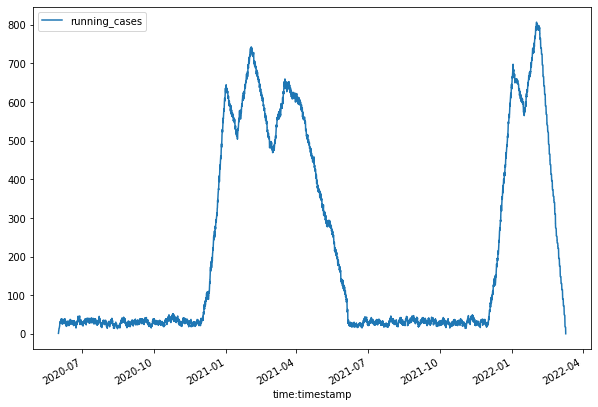

In [12]:
df_diff.plot(x='time:timestamp', y='running_cases', figsize=(10,7))

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*
<div style="color:green">
    
One could observe a distinct spike in the number of running cases during the first half of 2021; i.e., starting Jan 2021 until June 2021. The number of running cases again increase from Jan 2022 and distinctly drops in Apr 2022 (which marks the end of the data).
</div>

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

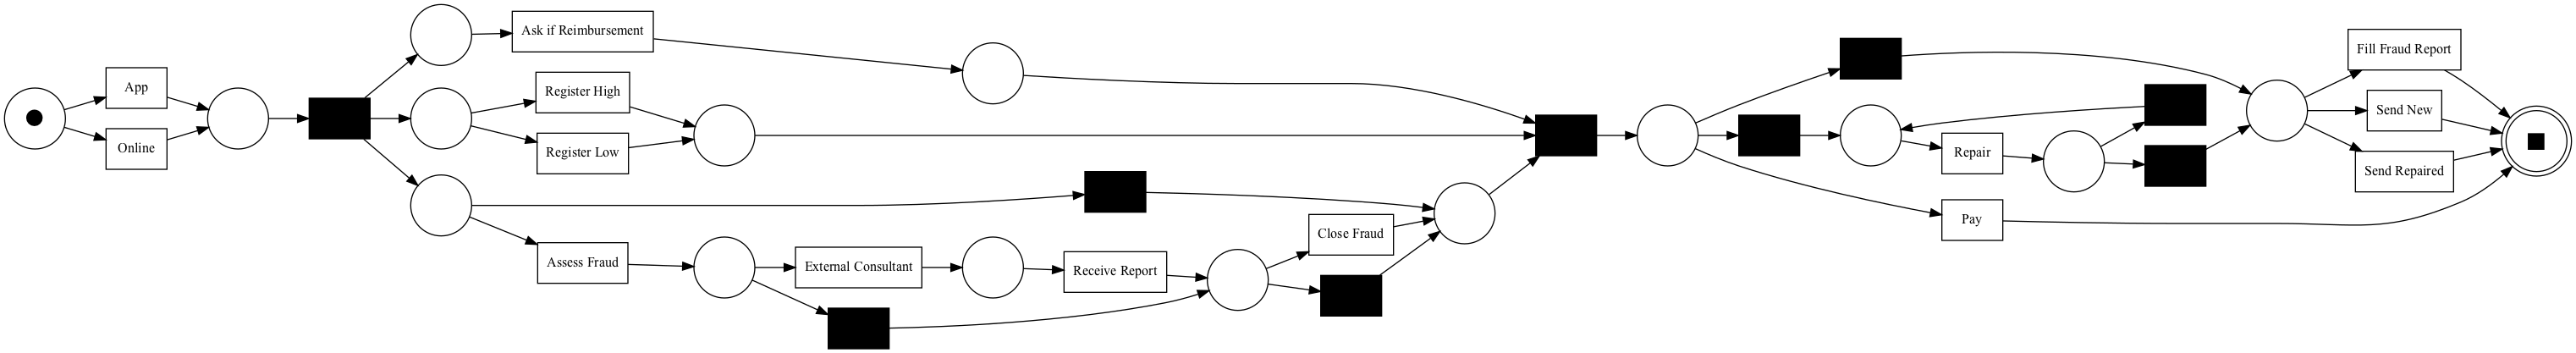

In [13]:
# your code
net, im, fm = pm4py.discover_petri_net_inductive(log)
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [14]:
def token_based_replay_fitness(log, net,  im , fm):
    fitness_d = pm4py.conformance_diagnostics_token_based_replay(log, net, im, fm)
    tm = 0
    tc = 0
    tp = 0
    tr = 0
    for td in fitness_d:
        tm = tm + td['missing_tokens']
        tc = tc + td['consumed_tokens']
        tp = tp + td['produced_tokens']
        tr = tr + td['remaining_tokens']
    fitness_score = 0.5*(1-(float(tm)/tc)) + 0.5*(1-(float(tr)/tp))
    return fitness_score

print("Token based reply fitness: {}".format(token_based_replay_fitness(log, net,  im , fm))) 

replaying log with TBR, completed variants ::   0%|          | 0/266 [00:00<?, ?it/s]

Token based reply fitness: 1.0


In [15]:
# Check
# from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
# fitness_tb = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
# print("Token based reply fitness: {}".format(fitness_tb['log_fitness']))

#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [16]:
# your code
log_low = pm4py.filter_event_attribute_values(log, "concept:name", 
                                               ["Register Low"], level="case", retain=True)
print("Number of traces in log_low: {}".format(len(log_low)))

Number of traces in log_low: 7021


In [17]:
#check
# for c in log_low:
#     check = False
#     for e in c:
#         if e['concept:name']  == 'Register Low':
#             check = True
#     if not check:
#         print(c.attributes['concept:name'])

#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


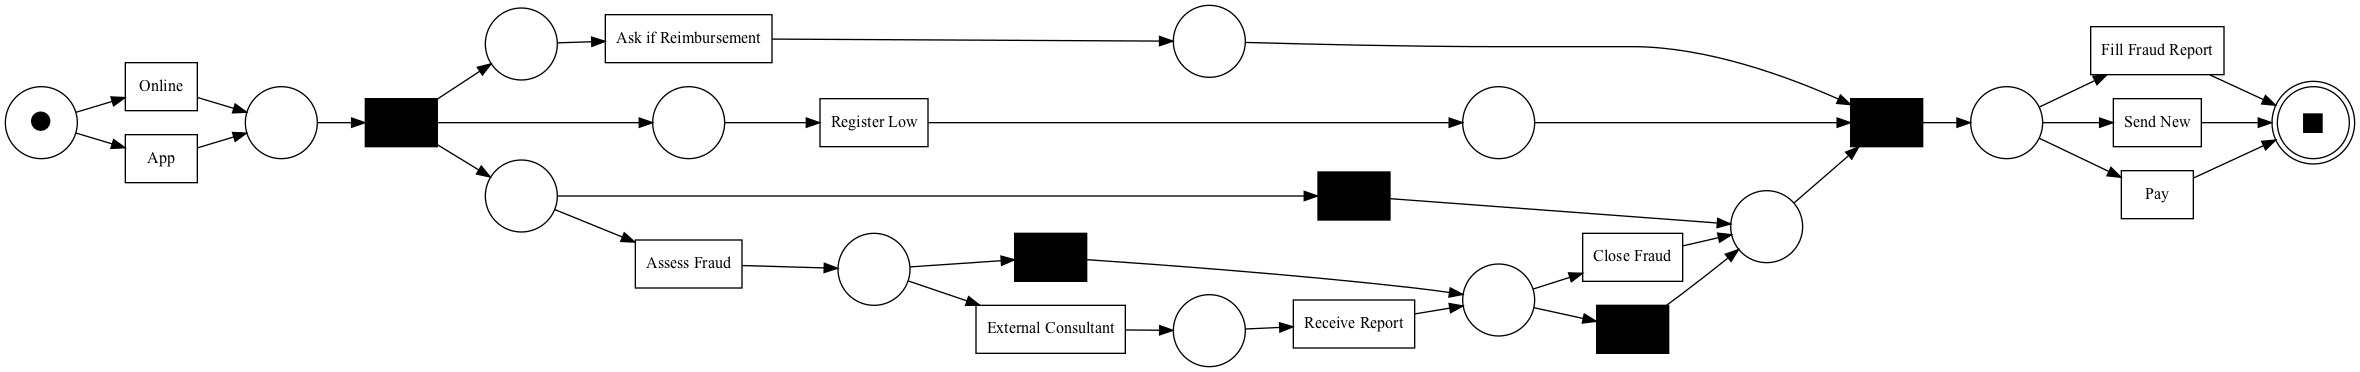

In [18]:
# your code
net_lo, im_lo, fm_lo = pm4py.discover_petri_net_inductive(log_low)
pm4py.view_petri_net(net_lo, im_lo, fm_lo, format='png') 

In [19]:
print("Token based reply fitness: {}".format(token_based_replay_fitness(log_low, net_lo,  im_lo , fm_lo))) 

replaying log with TBR, completed variants ::   0%|          | 0/94 [00:00<?, ?it/s]

Token based reply fitness: 1.0


**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

<div style="color:green">

Let the model discovered from the full log be **IM_full**, and let the model discovered from log_low be **IM_low**.
**IM_low** does not allow repairs and the sending of repaired items, while **IM_full** allows them.
    
</div>

**Your answer**: *(Relate your observations to precision here.)*

<div style="color:green">
    
In the first model, the activity _Repeat_ can happen repeatedly in the loop. As a consequence, the model allows for infinite traces. However, the second model does not contain such loops, making it more procise than the first.  
    
    
</div>

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



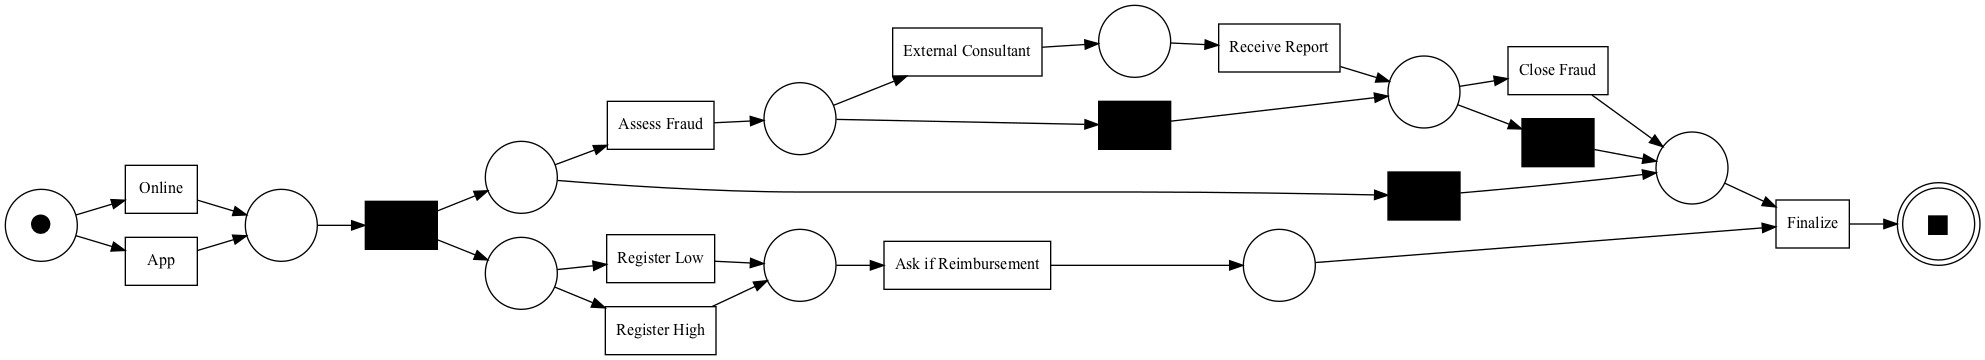

In [20]:
# your code
from pm4py.objects.petri_net.importer import importer as pnml_importer
net_conf, im_conf, fm_conf = pnml_importer.apply('datasets/pn_conf.apnml')
pm4py.view_petri_net(net_conf, im_conf, fm_conf, format='png') 

In [21]:
log_conf = pm4py.read_xes('datasets/log_conf.xes') 

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [22]:
print("Token based reply fitness: {}".format(token_based_replay_fitness(log_conf, net_conf,  im_conf , fm_conf))) 

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

Token based reply fitness: 0.9892890758104679


#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [23]:
# your code

from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

replaying log with TBR, completed variants ::   0%|          | 0/122 [00:00<?, ?it/s]

In [24]:
#place_fitness[place_list[0]]

In [25]:
place_list = list(place_fitness.keys())
tm = []
tc = []
tr = []
tp = []
for place in place_list:
    tm.append(place_fitness[place]['m'])
    tc.append(place_fitness[place]['c'])
    tp.append(place_fitness[place]['p'])
    #tr.append(place_fitness[place]['r'])
    r = place_fitness[place]['m'] + place_fitness[place]['c'] - place_fitness[place]['p']
    tr.append(r)

place_tokens = pd.DataFrame(list(zip(place_list,tm,tc,tp,tr)), 
                            columns=['place', 'missing','consumed','produced', 'remaining'])
place_tokens

place  missing  consumed  produced  remaining
0     n1       44     10000     10000         44
1     n4        0      1917      1917          0
2     n2        0     10000     10000          0
3     n6        0     10000     10000          0
4    n10        0     10000     10000          0
5     n3        0        99        99          0
6     n5        0     10000     10000          0
7     n7        0     10000     10000          0
8     n8        0     10000     10000          0
9     n9        0      1917      1917          0
10   n11        0     10000     10000          0

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [26]:
# your code
print("We print all unfitting traces: \n\n")
for t in place_fitness[place_list[0]]['underfed_traces']:
    print([e['concept:name'] for e in t])

We print all unfitting traces: 


['Online', 'Ask if Reimbursement', 'Register Low', 'Finalize']
['Online', 'Ask if Reimbursement', 'Assess Fraud', 'Register Low', 'External Consultant', 'Receive Report', 'Finalize']
['App', 'Ask if Reimbursement', 'Assess Fraud', 'Register Low', 'External Consultant', 'Receive Report', 'Close Fraud', 'Finalize']
['App', 'Ask if Reimbursement', 'Register High', 'Finalize']
['Online', 'Assess Fraud', 'Ask if Reimbursement', 'Register Low', 'Finalize']
['Online', 'Ask if Reimbursement', 'Assess Fraud', 'Register Low', 'Finalize']
['App', 'Ask if Reimbursement', 'Assess Fraud', 'Close Fraud', 'Register Low', 'Finalize']
['App', 'Ask if Reimbursement', 'Assess Fraud', 'Register Low', 'Close Fraud', 'Finalize']
['App', 'Assess Fraud', 'Close Fraud', 'Ask if Reimbursement', 'Register Low', 'Finalize']
['App', 'Assess Fraud', 'Ask if Reimbursement', 'Register Low', 'Close Fraud', 'Finalize']
['App', 'Ask if Reimbursement', 'Register Low', 'Assess Fraud', 'Clo

In [27]:
print("Total number of unfitting traces : {}".format(len(place_fitness[place_list[0]]['underfed_traces'])))

Total number of unfitting traces : 44


**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

<div style="color:green">
    
In the unfitting traces, the event **"Ask if Reimbursement"** occurs before the event **"Register Low (or High)"**, and this sequence is not allowed in the de-jure model
    
</div>

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

<div style="color:green">

Consider the place (**n1**) that consists of directed arcs **from** the transitions **Register High** and **Register Low**, and a directed arc **to** the transition **Ask if Reimbursement**. Whenever, **Ask if Reimbursement** occurs without **Register High** or **Register Low**, the transition **Ask if Reimbursement** is not activated because **n1** does not contain a token. Thus, for each of those unfitting traces, a missing token is added to **n1**, and when **Register Low** or **Register High** occurs after **Ask if Reimbursement**, a token in added to **n1** which is never utilized, thereby leaving a remaining token. This happens for all 44 unfitting traces. Therefore, **n1** consists of 44 missing and remining tokens.
    
</div>

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


In [28]:
# your code
log_fraud = pm4py.filter_event_attribute_values(log, "concept:name", 
                                               ["Fill Fraud Report"], level="case", retain=True)
print("Number of traces in log_fraud: {}".format(len(log_fraud)))

Number of traces in log_fraud: 354


In [29]:
frauds = []
for t in log_fraud:
    x = set()
    for e in t:
        x.add(e['Brand'])
    frauds = frauds + list(x)

<BarContainer object of 3 artists>

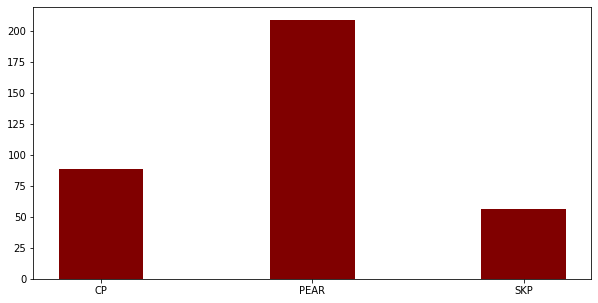

In [30]:
import numpy as np
import matplotlib.pyplot as plt

brands, counts = np.unique(frauds, return_counts=True)

fig = plt.figure(figsize = (10, 5))
plt.bar(brands, counts, color ='maroon',
        width = 0.4)

**Your answer:** (*Describe the plot in two to three sentences.*)

<div style="color:green">

Among the 354 cases involved in fraud, the brand PEAR accounts for the maximum number of frauds (over 200). The share of the remaining fraudulant cases are split between the brands CP and SKP.
    
</div>

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


/Users/aravind/.local/lib/python3.9/site-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


Text(0, 0.5, 'Number of cases')

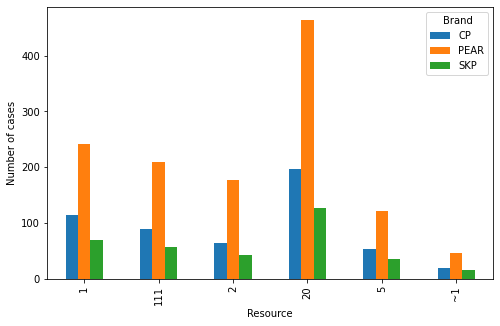

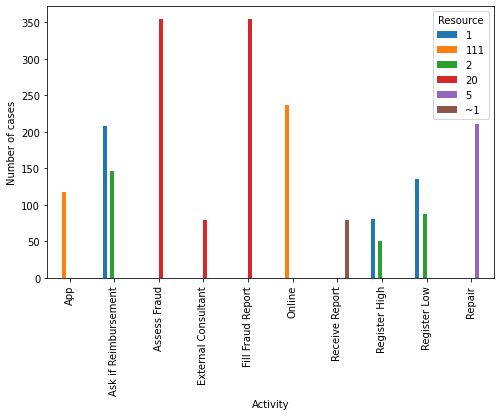

In [31]:
# your code (for a short additional analysis)
df_fraud = pm4py.convert_to_dataframe(log_fraud)
ax = df_fraud.groupby(['Resource', 'Brand'])['CaseId'].count().unstack().plot( kind='bar',figsize=(8,5))
ax.set_ylabel("Number of cases")

ax = df_fraud.groupby(['Activity', 'Resource'])['CaseId'].count().unstack().plot( kind='bar',figsize=(8,5))
ax.set_ylabel("Number of cases")

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*

<div style="color:green">

In the first plot, we investigate if there are any surpring association between resources and brands. We do not observe any distinct association, except that **Resource 20** was involved in maximum number of fraud cases in all three brands. In the second plot, we investigate if there are any surprising association between activities and resources. We find strong association between **Resource 20** and fraud assesment related activities **Asses Fraud** and **Fill Fraud Report**.
    
</div>

## Question 6 - Simpson's Paradox (3 pts)

### Sex Bias in Berkeley Graduate Admissions?

In the Fall of 1973, the University of California at Berkeley released data about their graduate class. The data showed the major the applicant applied to, their self-reported gender (Male or Female), and whether or not they were accepted or rejected. The acceptance rates between men and women were different. This caused immediate concern in the public as people thought that Berkeley was biased against women.

The "Berkeley Dataset" contains all 12,763 applicants to UC-Berkeley's graduate programs in Fall 1973. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions.

Dataset Variables:

Year : number ➜ The application year (this value is always 1973)

Major : string ➜: An anonymized major code (either A, B, C, D, E, F, or Other). The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973

Gender : string ➜ Applicant self-reported gender (either M or F)

Admission: string ➜ Admission decision (either Rejected or Accepted)

**a)**
Upload the data from the `berkeley.csv` file and load it into a dataframe named `data`. Display the first few lines from the dataframe.

In [141]:
import pandas as pd

In [142]:
# your code
df = pd.read_csv('datasets/berkeley.csv', sep=',')

**b)** Remove the "Year" column as it does not contain any information in this dataset (all years are 1973.)

In [143]:
# your code
df = df.drop(columns=['Year'])

**c)** For each of the values of column "Gender", compute the admission rate and compare them against each other.

In [144]:
# your code
s1 = df[['Gender', 'Admission']].groupby(['Gender']).count()
s2 = df[['Gender', 'Admission']].query("Admission == 'Accepted'").groupby(['Gender']).count()
result = s2.div(s1).round(4).add_suffix(' Rate')
result.join(s1).rename(columns={"Admission": "Total Applicants"})

Admission Rate  Total Applicants
Gender                                  
F               0.3458              4321
M               0.4428              8442

**Your answer:**

<div style="color:green">

The admission rate of Male applicants is almost 10 percent higher than that of the female applicants.
    
</div>

**d)** For each value combination of the "Gender" and "Major" columns, compute the admission rate. Compare the admission rate of women against the admission rate of men for each of the majors.

In [145]:
# your code
s1 = df.groupby(['Gender', 'Major']).count()
s2 = df.query("Admission == 'Accepted'").groupby(['Gender', 'Major']).count()
result = s2.div(s1).round(2).add_suffix(' Rate')
result
result.unstack().T.reset_index(level=0, drop=True)

Gender     F     M
Major             
A       0.82  0.72
B       0.68  0.63
C       0.34  0.37
D       0.35  0.33
E       0.24  0.28
F       0.07  0.06
Other   0.38  0.41

Text(0, 0.5, 'Admission Rate')

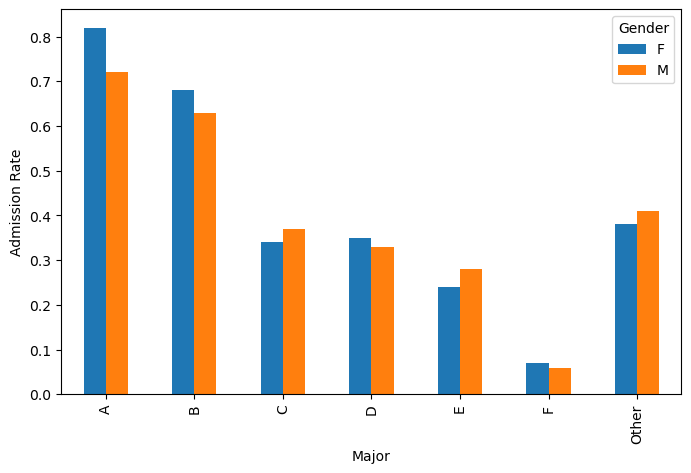

In [146]:
ax = result.unstack().T.reset_index(level=0, drop=True).plot( kind='bar',figsize=(8,5))
ax.set_ylabel("Admission Rate")

**Your answer:**

<div style="color:green">

The admission rates of male and female applicants are calculated separately for each major and the results are shown as a bar chart. We infer that, for the majors **A, B, D** and **F**, female applicants had had a higher admission rate than the male applicants.
    
</div>

**e)** Can you confirm there is a sex bias in the admission rates of the students?

**Your answer:**

<div style="color:green">


Although the female applicants have a lower overall admisison rate than the male applicants, the admission rates of the female applicatants in 4 out of 7 Majors were observed to be higher than that of the male applicants. Therefore, we conclude that there was no sex bias. 
    
</div>

## Question 7: Big Data (15pts)

In [147]:
import pandas as pd

You are a data scientist at NASA, an agency for civil space programs, and with your team you develop and maintain the software of the NASA Crew Exploration Vehicle (CEV).  Your task is to analyze the performance of the software, and as a first exploratory step, you would like to **compute the mean execution times** of function calls within that software. Since the running vehicle will generate a high throughput of observable events in a stream, you decide to set up a MapReduce pipeline in Hadoop. 

The file **nasa-cev-software-tests.tsv** records timestamped events of the vehicle's software tests. The log contains the columns *Case*, *Activity* and *Timestamp*, denoting the case ID, the activity key (method call) and timestamp of the event record in nanoseconds, respectively. Furthermore, the log contains the columns *Lifecycle Transition* and *Execution ID*. The lifecycle transition takes either of the values *start* and *complete*, stating whether the corresponding activity (method call) in that row is being started or completed at the specified timestamp. The execution ID relates each event to a concrete method call, i.e., for each execution ID, there are exactly two entries (namely a *start* and a *complete* event) in the log.

### a) Plan the Maths (2pt):

The mean $\mu_n$ over numerical values $v_1,...,v_n$ is well-known to be computed as $\mu_n = \frac{1}{n}\sum_{i=1}^{n} v_i$.\
One may also use the alternative recursive formalization $\mu_{n+m} = \frac{n\cdot\mu_{n} + m\cdot\mu_{m}}{n+m}$. \
What is the advantage of using the alternative formalization when you think of handling streaming data or distributed data? Briefly explain.


**Your answer:**

<div style="color:green">

In streaming data, there is a continous arrival of new data, and the mean values have to be continously updated. For a total of $n$ numerical value
The computation of the mean using the regular formula requires an $\mathcal{O}(n)$ operation for every update; i.e., for every new data arrival, the mean is computed over the entire data. The recursive formulation reuses the mean calculated from the previous data, and makes an update using only the $m \ (<< n)$ new data with an $\mathcal{O}(m)$ operation.  
    
</div>

### b) Set up MapReduce (10pts)

Realize the computation of the mean execution times of activities as a MapReduce job. 
You need to implement this a cascaded MapReduced job. This means that the output of the first job will serve as the input of the second job. In the first job, derive the execution times of each activity execution, i.e. the time difference between the *complete* and the *start* lifecycle transition of each activity execution. In the second step, aggregate this timing information to compute the mean.

#### **b(i)** 
Specify the *function signatures* of the map functions and the reduce functions that you are going to use.\
I.e., find concrete sets to substitute $K_1, V_1, ... $ in the general signatures for map and reduce functions \

$ map:  K_1 \times V_1 \rightarrow (K_2 \times V_2)^* $\
$ reduce: K_2 \times (V_2)^* \rightarrow (V_3)^*$ (or a singleton $V_3$) 

*Hint: You may introduce symbols to denote sets, e.g. $Act$ for the set of activities.\
You may also first implement the solution (b(ii)) to get an idea about the underlying signatures.\
Mind that you need two map and two reduce functions.*

**Your answer:**


<div style="color:green">

Let **E** be the set of Execution IDs

Let **T** be the set of Time stamps

Let **A** be the set of activities

*map 1* :  $(\mathbf{E} \times \mathbf{A}) \times \mathbf{T} \to ((\mathbf{E} \times \mathbf{A}) \times \mathbf{T})*$

*reduce 1* :  $(\mathbf{E} \times \mathbf{A}) \times (\mathbf{T})* \to (\mathbf{E} \times \mathbf{A}) \times \mathbf{V}_1$

$\mathbf{V}_1$ is the set of execution times observed for every execution of the activities 

*map 2* :  $(\mathbf{E} \times \mathbf{A}) \times \mathbf{V}_1 \to (\mathbf{A} \times \mathbf{V}_1)*$

*reduce 2* :  $ \mathbf{A} \times (\mathbf{V}_1)* \to \mathbf{A} \times \mathbf{V}_2$

$\mathbf{V}_2$ is the set of mean execution times of the activities 
    
</div>

#### **b(ii)**: 
Specify map functions and reduce functions to compute the mean execution time per activity as python scripts.

In [ ]:
# your code (nasa_mapper1.py)

#!/usr/bin/env python
import sys
    
for line in sys.stdin:
    line = line.strip()
    words = line.split('\t')
    key = "{} {}".format(words[-1].strip(), words[0].strip())
    value = "{}".format(words[1].strip())
    print("{}\t{}".format(key,value))

In [49]:
# your code (nasa_reducer1.py)

#!/usr/bin/env python
import sys


current_key = None
current_val = 0

for line in sys.stdin:
    line = line.strip()
    key, val = line.split('\t')

    if current_key == key:
        current_val = abs(int(val)-int(current_val))
    else:
        if current_key:
            print("{}\t{}".format(current_key, current_val))
        current_key = key
        current_val = val
 
if current_key:
    print("{}\t{}".format(current_key, current_val))

In [50]:
# your code (nasa_mapper2.py)

#!/usr/bin/env python
import sys

for line in sys.stdin:
    line = line.strip()
    words = line.split('\t')
    key = "{}".format(words[0].strip().split(' ')[1])
    value = "{}".format(words[1].strip())
    print("{}\t{}".format(key,value))



In [51]:
# your code (nasa_reducer2.py)
#!/usr/bin/env python
import sys


current_key = None
current_val = 0
mu = 0


for line in sys.stdin:
    line = line.strip()
    key, val = line.split('\t')

    if current_key == key:
        mu =  (n*float(mu) + float(val))/(n+1)
        n = n+1
    else:
        if current_key:
            print("{}\t{}".format(current_key, mu))
        current_key = key
        mu = val
        n = 1
 
if current_key:
    print("{}\t{}".format(current_key, mu))

### c) Run MapReduce (3pts)

In the following, please use one of your team members' matriculation number as an identifier.

#### **c(i) (Randomization)**: 
Before applying your functions from the previous step to the dataset, please insert the matriculation number and run the following lines to randomly filter out a few of the traces in the event log, and continue working with the filtered log. 


In [52]:
# your matriculation number here
matr_nb = 351286

# utility code (do not change)
import random
random.seed(matr_nb)

full_df = pd.read_csv("datasets/nasa-cev-software-tests.tsv", sep="\t")

case_ids = list(set(full_df["Case"].values))
case_ids.sort()
filtered_out_case_ids = random.sample(case_ids, 10)
filtered_case_ids = [case_id for case_id in case_ids if case_id not in filtered_out_case_ids]
randomized_df = full_df[full_df["Case"].isin(filtered_case_ids)]

randomized_df.to_csv("datasets/nasa-cev-software-tests-randomized-" + str(matr_nb) + ".tsv",
          columns=["Activity", "Timestamp", "Lifecycle Transition", "Execution ID"],
          sep="\t", index=False, header=False)

#### **c(ii)**:
Now, it is time to work with the Hadoop Distributed File System (HDFS). Follow the instructions below and show your results in each step (screenshots of the command line).

    1) Import the event log to your Docker engine (at /usr/local/hadoop/(your_matr_nb)-event-log/). You also need to import the python scripts, but only document the event log import here.
    2) Upload the files to the running HDFS (at /input/(your_matr_nb)-event-log/).
	3) Run Hadoop commands for the MapReduce computation.
    4) Show the final output (computed mean execution times).

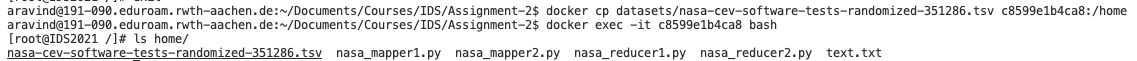

In [53]:
from IPython.display import Image
# your code
Image(filename='imgs/cii-1.png')

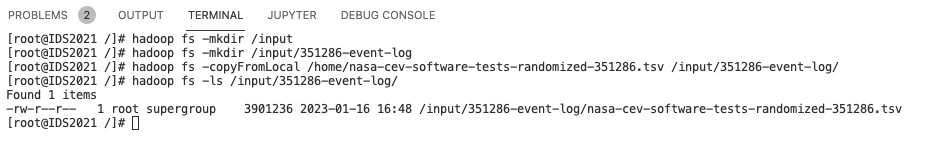

In [54]:
# your code
Image(filename='imgs/cii-2.png')

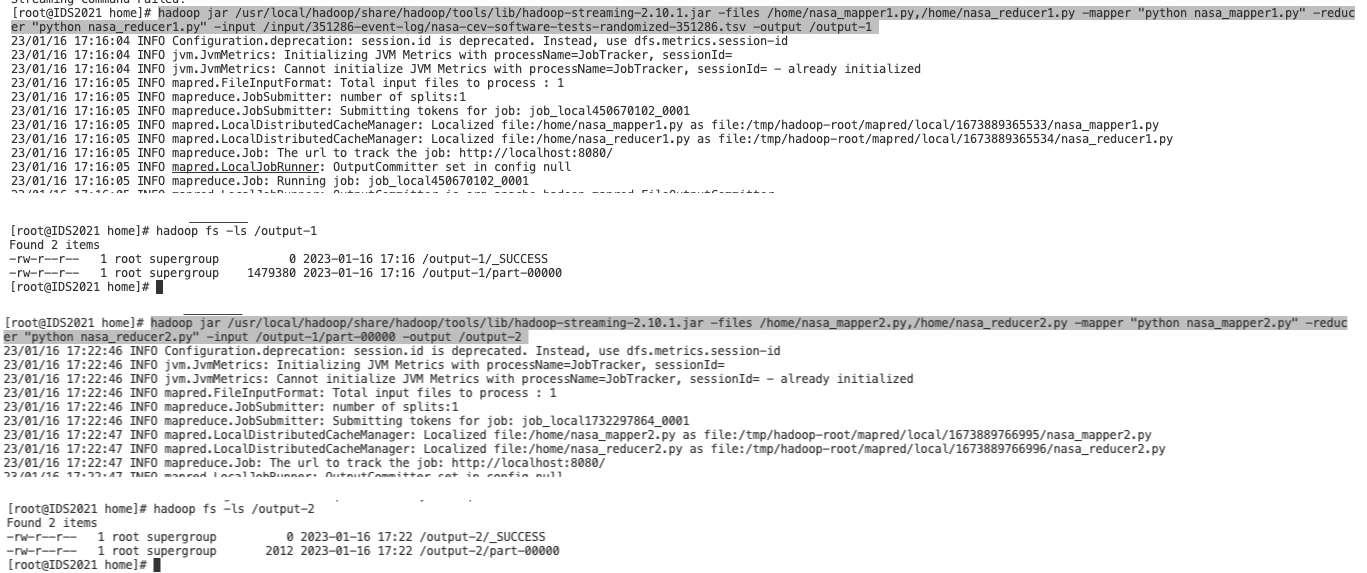

In [55]:
# your code
Image(filename='imgs/cii-3.png')

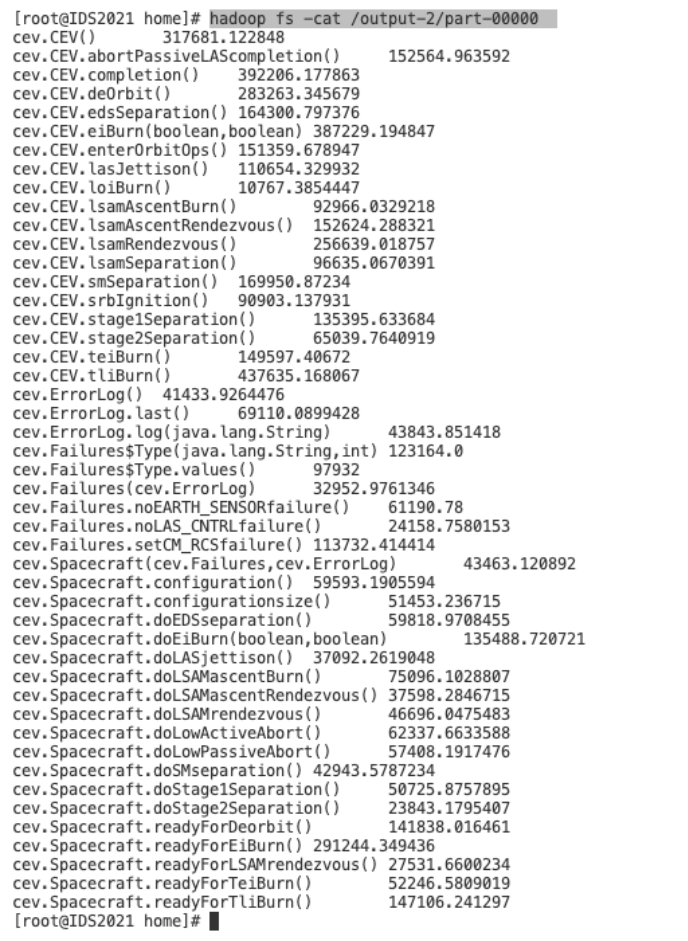

In [57]:
# your code
Image(filename='imgs/cii-4.png')